In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# Download latest version
path = kagglehub.dataset_download("pralabhpoudel/world-energy-consumption")
print("Path to dataset files:", path)

# Find the CSV file in the downloaded path
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    csv_file = os.path.join(path, csv_files[0])
    print(f"Found CSV file: {csv_files[0]}")
else:
    raise FileNotFoundError("No CSV file found in the downloaded dataset")

# Load the dataset
df = pd.read_csv(csv_file)

print("\n" + "="*50)
print("Original dataset shape:", df.shape)
print("\n" + "="*50)

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n" + "="*50)

# Drop rows with any missing values
#df_clean = df.dropna()
# Only drop rows missing essential columns
df_clean = df.dropna(subset=['country', 'year', 'iso_code'])
print("\nDataset shape after dropping missing values:", df_clean.shape)
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

print("\n" + "="*50)

# Count the number of rows for each country
country_counts = df_clean['country'].value_counts().sort_values(ascending=False)

print("\nNumber of rows per country:")
print(country_counts)

print("\n" + "="*50)

# Summary statistics
print(f"\nTotal number of countries: {len(country_counts)}")
print(f"Average rows per country: {country_counts.mean():.2f}")
print(f"Median rows per country: {country_counts.median():.2f}")
print(f"Min rows for a country: {country_counts.min()}")
print(f"Max rows for a country: {country_counts.max()}")

print("\n" + "="*50)

# Countries with sufficient data (e.g., at least 30 rows)
threshold = 30
countries_with_sufficient_data = country_counts[country_counts >= threshold]
print(f"\nCountries with at least {threshold} rows: {len(countries_with_sufficient_data)}")
print(countries_with_sufficient_data)

# Save the cleaned dataset
output_path = 'world-energy-consumption-clean.csv'
df_clean.to_csv(output_path, index=False)
print("\n" + "="*50)
print(f"\nCleaned dataset saved as '{output_path}'")

# Display basic info about the cleaned dataset
print("\nCleaned dataset info:")
print(df_clean.info())

100%|██████████| 2.25M/2.25M [00:01<00:00, 2.01MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pralabhpoudel/world-energy-consumption/versions/3
Found CSV file: World Energy Consumption.csv

Original dataset shape: (22012, 129)


Missing values per column:
iso_code                    5500
population                  3889
gdp                        10899
biofuel_cons_change_pct    20265
biofuel_cons_change_twh    19325
                           ...  
wind_elec_per_capita       14947
wind_electricity           14016
wind_energy_per_capita     17947
wind_share_elec            15126
wind_share_energy          17911
Length: 127, dtype: int64


Dataset shape after dropping missing values: (16512, 129)
Rows removed: 5500


Number of rows per country:
country
Algeria        123
Argentina      123
Angola         123
Australia      123
Belgium        123
              ... 
Eritrea         28
Palestine       25
East Timor      19
Montenegro      18
South Sudan     11
Name: count, Length: 219, dtype: int64


Total number of countries: 

# Task
Plot the energy consumption, production, and other relevant metrics for each of the 19 countries with some data.

## Identify relevant columns

### Subtask:
Determine which columns are suitable for plotting against countries. We should consider columns that represent energy consumption, production, or other relevant metrics.


**Reasoning**:
Identify the columns related to energy consumption, production, and other relevant metrics by examining the column names in `df_clean` and filter for quantitative columns with non-zero values.



In [ ]:
# Identify relevant columns for plotting
relevant_columns = []
for col in df_clean.columns:
    # Check if the column name contains relevant keywords and is numeric
    if any(keyword in col for keyword in ['cons', 'prod', 'share', 'elec', 'energy', 'gdp', 'population']) and \
       df_clean[col].dtype in ['float64', 'int64']:
        # Check if the column has any non-zero values
        if (df_clean[col] != 0).any():
            relevant_columns.append(col)

print("Relevant columns for plotting:")
print(relevant_columns)

Relevant columns for plotting:
['population', 'gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_generation', 'electricity_share_energy', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consumption', 'gas_elec_per_capita', '

## Filter data by country

### Subtask:
For each country identified in the previous analysis (the 19 countries with some data), filter the DataFrame to include only the data for that specific country.


**Reasoning**:
Create a dictionary to store filtered dataframes and iterate through the countries with data to filter the main dataframe for each country and store it in the dictionary.



In [ ]:
# Create a dictionary to store filtered dataframes for each country
country_dataframes = {}

# Iterate through the countries with data
for country in country_counts.index:
    # Filter the df_clean DataFrame for the current country
    country_df = df_clean[df_clean['country'] == country].copy()

    # Store the filtered dataframe in the dictionary
    country_dataframes[country] = country_df

# Display the keys of the dictionary to confirm filtering
print("Filtered dataframes created for the following countries:")
print(country_dataframes.keys())

Filtered dataframes created for the following countries:
dict_keys(['Algeria', 'Argentina', 'Angola', 'Australia', 'Belgium', 'Brazil', 'Bolivia', 'Bangladesh', 'Austria', 'Bahrain', 'Brunei', 'Gabon', 'France', 'Greece', 'Germany', 'Hungary', 'Ecuador', 'Egypt', 'Denmark', 'Congo', 'China', 'Chile', 'Colombia', 'Burundi', 'Canada', 'Bulgaria', 'India', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Spain', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey', 'Pakistan', 'Norway', 'Oman', 'Nigeria', 'New Zealand', 'Mexico', 'Mongolia', 'Myanmar', 'United Kingdom', 'Venezuela', 'Zimbabwe', 'United States', 'Vietnam', 'Thailand', 'Trinidad and Tobago', 'United Arab Emirates', 'Tunisia', 'Syria', 'Taiwan', 'Sweden', 'Switzerland', 'Japan', 'Italy', 'Ireland', 'Morocco', 'Netherlands', 'Malaysia', 'Libya', 'Kuwait', 'Iraq', 'Iran', 'Indonesia', 'Israel', 'Guatemala', 'Eswatini', 'Ghana', 'Mozambique', 'Tanzania', 'Suriname', 'Zambia', 'Democratic Republic of Congo', 

In [ ]:
# Calculate the percentage of missing values for each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Display columns with missing values and their percentages, sorted in descending order
print("Percentage of missing values per column:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

Percentage of missing values per column:
biofuel_cons_change_pct    92.063420
solar_cons_change_pct      90.350718
biofuel_cons_per_capita    89.542068
wind_cons_change_pct       89.037798
nuclear_cons_change_pct    88.792477
                             ...    
gas_prod_change_twh        24.968199
gas_production             23.809740
oil_prod_change_twh        22.097038
oil_production             20.929493
population                 17.667636
Length: 127, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Get the list of countries
countries = list(country_dataframes.keys())

# Create a dropdown widget for country selection
country_dropdown = widgets.Dropdown(
    options=countries,
    description='Select Country:',
    disabled=False,
)

# Function to generate and display plots for the selected country
def display_country_plots(country):
    if country in country_dataframes:
        country_df = country_dataframes[country]

        print(f"Generating plots for {country}...")

        # Iterate through relevant columns and create a plot for each
        for col in relevant_columns:
            # Check if the column exists in the country's dataframe and has data
            if col in country_df.columns and not country_df[col].dropna().empty:
                plt.figure(figsize=(12, 6))
                plt.plot(country_df['year'], country_df[col])
                plt.title(f'{col} in {country} over Time')
                plt.xlabel('Year')
                plt.ylabel(col)
                plt.grid(True)
                plt.show()
            else:
                print(f"No data to plot for column '{col}' in {country}.")

    else:
        print(f"Data for {country} not found.")

# Link the dropdown to the display function and display the interactive output
interactive_plot = widgets.interactive(display_country_plots, country=country_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Select Country:', options=('Algeria', 'Argentina', 'Angola', 'Aust…

In [ ]:
print("ADDING ENHANCED FEATURES")


print("\nAdding geographic features...")

continent_mapping = {
    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Cyprus': 'Europe', 'Czechia': 'Europe', 'Denmark': 'Europe',
    'Estonia': 'Europe', 'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Greece': 'Europe', 'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malta': 'Europe', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', 'Serbia': 'Europe',
    'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Ukraine': 'Europe', 'United Kingdom': 'Europe',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'Georgia': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia',
    'Laos': 'Asia', 'Lebanon': 'Asia', 'Malaysia': 'Asia', 'Maldives': 'Asia',
    'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia', 'North Korea': 'Asia',
    'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia', 'Philippines': 'Asia',
    'Qatar': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia',
    'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia',
    'Thailand': 'Asia', 'Timor': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa',
    'Democratic Republic of Congo': 'Africa', 'Djibouti': 'Africa', 'Egypt': 'Africa',
    'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Ghana': 'Africa', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Ivory Coast': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Libya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa',
    'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa',
    'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa',
    'Sao Tome and Principe': 'Africa', 'Senegal': 'Africa', 'Seychelles': 'Africa',
    'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa',
    'Sudan': 'Africa', 'Swaziland': 'Africa', 'Tanzania': 'Africa', 'Togo': 'Africa',
    'Tunisia': 'Africa', 'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # North America
    'Antigua and Barbuda': 'North America', 'Bahamas': 'North America', 'Barbados': 'North America',
    'Belize': 'North America', 'Canada': 'North America', 'Costa Rica': 'North America',
    'Cuba': 'North America', 'Dominica': 'North America', 'Dominican Republic': 'North America',
    'El Salvador': 'North America', 'Grenada': 'North America', 'Guatemala': 'North America',
    'Haiti': 'North America', 'Honduras': 'North America', 'Jamaica': 'North America',
    'Mexico': 'North America', 'Nicaragua': 'North America', 'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Trinidad and Tobago': 'North America',
    'United States': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Guyana': 'South America', 'Paraguay': 'South America', 'Peru': 'South America',
    'Suriname': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'Kiribati': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia (country)': 'Oceania', 'Nauru': 'Oceania', 'New Zealand': 'Oceania',
    'Palau': 'Oceania', 'Papua New Guinea': 'Oceania', 'Samoa': 'Oceania',
    'Solomon Islands': 'Oceania', 'Tonga': 'Oceania', 'Tuvalu': 'Oceania', 'Vanuatu': 'Oceania'
}

# Function to add features to each country dataframe
def add_continent_feature(country_df, country_name):
    """Add continent column to a country dataframe"""
    continent = continent_mapping.get(country_name, 'Other')
    country_df['continent'] = continent
    return country_df

def add_economic_features(country_df):
    """Add GDP per capita and wealth category"""
    if 'gdp' in country_df.columns and 'population' in country_df.columns:
        country_df['gdp_per_capita'] = country_df['gdp'] / country_df['population']

        # Wealth category function
        def categorize_wealth(gdp_per_capita):
            if pd.isna(gdp_per_capita):
                return 'Unknown'
            elif gdp_per_capita < 5000:
                return 'Low Income'
            elif gdp_per_capita < 15000:
                return 'Lower Middle Income'
            elif gdp_per_capita < 40000:
                return 'Upper Middle Income'
            else:
                return 'High Income'

        country_df['wealth_category'] = country_df['gdp_per_capita'].apply(categorize_wealth)

    return country_df

# Update all country dataframes with new features
print("Updating country dataframes with geographic and economic features...")
for country, country_df in country_dataframes.items():
    country_dataframes[country] = add_continent_feature(country_df, country)
    country_dataframes[country] = add_economic_features(country_df)

print(f" Updated {len(country_dataframes)} country dataframes")


ADDING ENHANCED FEATURES

Adding geographic features...
Updating country dataframes with geographic and economic features...
 Updated 219 country dataframes


In [ ]:
print("Creating continent-based groups...")

# Group countries by continent
continent_groups = {}
for country, country_df in country_dataframes.items():
    if 'continent' in country_df.columns and len(country_df) > 0:
        continent = country_df['continent'].iloc[0]
        if continent not in continent_groups:
            continent_groups[continent] = []
        continent_groups[continent].append(country)

print("Countries by continent:")
for continent, countries in sorted(continent_groups.items()):
    print(f"  {continent}: {len(countries)} countries")

Creating continent-based groups...
Countries by continent:
  Africa: 52 countries
  Asia: 47 countries
  Europe: 40 countries
  North America: 23 countries
  Oceania: 12 countries
  Other: 33 countries
  South America: 12 countries


In [ ]:
print("Creating wealth-based groups...")

# Group countries by wealth (using most recent year)
wealth_groups = {}
for country, country_df in country_dataframes.items():
    if 'wealth_category' in country_df.columns and len(country_df) > 0:
        # Get most recent wealth category
        recent_wealth = country_df.sort_values('year').iloc[-1]['wealth_category']
        if recent_wealth not in wealth_groups:
            wealth_groups[recent_wealth] = []
        wealth_groups[recent_wealth].append(country)

print("Countries by wealth category (most recent year):")
for wealth, countries in sorted(wealth_groups.items()):
    print(f"  {wealth}: {len(countries)} countries")

Creating wealth-based groups...
Countries by wealth category (most recent year):
  Unknown: 219 countries


In [ ]:
print("Creating country similarity mappings...")

def find_similar_countries(target_country, all_country_dfs, n_similar=5):
    """
    Find countries similar to target based on:
    - Same continent
    - Similar GDP per capita
    - Similar population
    """
    if target_country not in all_country_dfs:
        return []

    target_df = all_country_dfs[target_country]

    # Get most recent data for target
    if len(target_df) == 0:
        return []

    target_recent = target_df.sort_values('year').iloc[-1]

    if 'continent' not in target_recent or pd.isna(target_recent['continent']):
        return []

    target_continent = target_recent['continent']
    target_gdp = target_recent.get('gdp_per_capita', None)
    target_pop = target_recent.get('population', None)

    # Find similar countries
    similar_countries = []

    for country, country_df in all_country_dfs.items():
        if country == target_country or len(country_df) == 0:
            continue

        country_recent = country_df.sort_values('year').iloc[-1]

        # Must be same continent
        if country_recent.get('continent') != target_continent:
            continue

        # Calculate similarity score
        similarity_score = 0

        # GDP per capita similarity
        if target_gdp is not None and pd.notna(target_gdp):
            country_gdp = country_recent.get('gdp_per_capita', None)
            if country_gdp is not None and pd.notna(country_gdp):
                gdp_diff = abs(np.log10(target_gdp + 1) - np.log10(country_gdp + 1))
                similarity_score += gdp_diff

        # Population similarity
        if target_pop is not None and pd.notna(target_pop):
            country_pop = country_recent.get('population', None)
            if country_pop is not None and pd.notna(country_pop):
                pop_diff = abs(np.log10(target_pop + 1) - np.log10(country_pop + 1))
                similarity_score += pop_diff

        similar_countries.append((country, similarity_score))

    # Sort and return top N
    similar_countries.sort(key=lambda x: x[1])
    return [country for country, score in similar_countries[:n_similar]]

# Create similarity dictionary
country_similarities = {}
for country in country_dataframes.keys():
    similar = find_similar_countries(country, country_dataframes, n_similar=5)
    if similar:
        country_similarities[country] = similar

print(f"Created similarity groups for {len(country_similarities)} countries")

Creating country similarity mappings...
Created similarity groups for 219 countries


In [ ]:
example_countries = ['United States', 'Germany', 'China', 'Brazil', 'India']
print("\nExample similar countries:")
for example in example_countries:
    if example in country_similarities:
        print(f"  {example}: {country_similarities[example][:3]}")


Example similar countries:
  United States: ['Mexico', 'Canada', 'Guatemala']
  Germany: ['United Kingdom', 'France', 'Italy']
  China: ['India', 'Indonesia', 'Pakistan']
  Brazil: ['Colombia', 'Argentina', 'Peru']
  India: ['China', 'Indonesia', 'Pakistan']


# Task
Generate a correlation matrix for the full dataset and visualize it as a heatmap.

## Select numerical columns

### Subtask:
Identify the numerical columns in the original dataset (`df`) that are suitable for correlation analysis.


**Reasoning**:
Iterate through the columns of the original dataframe, check their data types, and identify numerical columns ('float64' or 'int64') for correlation analysis.



In [ ]:
# Identify numerical columns
numerical_cols = []
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        numerical_cols.append(col)

print("Numerical columns for correlation analysis:")
print(numerical_cols)

Numerical columns for correlation analysis:
['year', 'population', 'gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_generation', 'electricity_share_energy', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consumption', 'ga

## Handle missing values

### Subtask:
Handle missing values in the selected numerical columns.


**Reasoning**:
Handle missing values in the selected numerical columns by calculating the percentage of missing values, filtering out columns with a high percentage of missing values, and printing the results.



In [ ]:
# Calculate the percentage of missing values for each numerical column
missing_values_percentage_numerical = (df[numerical_cols].isnull().sum() / len(df)) * 100

# Define a threshold for missing values
missing_value_threshold = 50

# Create a new list of numerical columns by filtering out columns with high missing values
numerical_cols_filtered = missing_values_percentage_numerical[missing_values_percentage_numerical <= missing_value_threshold].index.tolist()

# Identify columns that were removed
removed_cols = [col for col in numerical_cols if col not in numerical_cols_filtered]

# Print the number of columns before and after filtering
print(f"Number of numerical columns before handling missing values: {len(numerical_cols)}")
print(f"Number of numerical columns after handling missing values (threshold = {missing_value_threshold}%): {len(numerical_cols_filtered)}")

# Print the columns that were removed
print(f"\nColumns removed due to high missing values:")
print(removed_cols)

Number of numerical columns before handling missing values: 127
Number of numerical columns after handling missing values (threshold = 50%): 15

Columns removed due to high missing values:
['biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_generation', 'electricity_share_energy', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consumption', 'gas_e

## Calculate correlation matrix

### Subtask:
Compute the pairwise correlation between the selected numerical columns.


**Reasoning**:
Compute the pairwise correlation matrix for the filtered numerical columns.



In [ ]:
# Select the numerical columns from the original DataFrame
df_numerical_filtered = df[numerical_cols_filtered]

# Calculate the pairwise correlation matrix
correlation_matrix = df_numerical_filtered.corr()

# Display the correlation matrix
display(correlation_matrix)

year  population       gdp  \
year                        1.000000    0.040486  0.085729   
population                  0.040486    1.000000  0.859094   
gdp                         0.085729    0.859094  1.000000   
coal_prod_change_twh        0.030960    0.385159  0.204580   
coal_prod_per_capita       -0.029599    0.043207  0.086921   
coal_production             0.082022    0.874528  0.857168   
energy_cons_change_pct     -0.064225   -0.006485 -0.010628   
energy_cons_change_twh     -0.018152    0.649849  0.688300   
gas_prod_change_twh         0.084764    0.533017  0.598780   
gas_prod_per_capita         0.131855   -0.023596  0.010272   
gas_production              0.181658    0.779738  0.875814   
oil_prod_change_twh         0.017440    0.297492  0.232206   
oil_prod_per_capita         0.024808   -0.030072 -0.014598   
oil_production              0.176835    0.864149  0.855148   
primary_energy_consumption  0.053712    0.869999  0.967715   

                            coal_prod_change_twh  coal_prod_per_capita  \
year                                    0.030960             -0.029599   
population                              0.385159              0.043207   
gdp                                     0.204580              0.086921   
coal_prod_change_twh                    1.000000              0.060681   
coal_prod_per_capita                    0.060681              1.000000   
coal_production                         0.431046              0.198558   
energy_cons_change_pct                  0.015261             -0.026857   
energy_cons_change_twh                  0.688650              0.061244   
gas_prod_change_twh                     0.309754              0.090819   
gas_prod_per_capita                    -0.009166              0.014332   
gas_production                          0.241879              0.112543   
oil_prod_change_twh                     0.191739              0.035947   
oil_prod_per_capita                    -0.010553             -0.028232   
oil_production                          0.273927              0.083175   
primary_energy_consumption              0.376715              0.118325   

                            coal_production  energy_cons_change_pct  \
year                               0.082022               -0.064225   
population                         0.874528               -0.006485   
gdp                                0.857168               -0.010628   
coal_prod_change_twh               0.431046                0.015261   
coal_prod_per_capita               0.198558               -0.026857   
coal_production                    1.000000               -0.014602   
energy_cons_change_pct            -0.014602                1.000000   
energy_cons_change_twh             0.676244                0.028174   
gas_prod_change_twh                0.486504                0.007447   
gas_prod_per_capita               -0.003149                0.003595   
gas_production                     0.803840               -0.022374   
oil_prod_change_twh                0.200479                0.012302   
oil_prod_per_capita               -0.020241                0.065443   
oil_production                     0.756579               -0.014509   
primary_energy_consumption         0.939907               -0.020735   

                            energy_cons_change_twh  gas_prod_change_twh  \
year                                     -0.018152             0.084764   
population                                0.649849             0.533017   
gdp                                       0.688300             0.598780   
coal_prod_change_twh                      0.688650             0.309754   
coal_prod_per_capita                      0.061244             0.090819   
coal_production                           0.676244             0.486504   
energy_cons_change_pct                    0.028174             0.007447   
energy_cons_change_twh                    1.000000             0.686229   
gas_prod_change_twh                       

## Visualize the correlation matrix

### Subtask:
Create a heatmap to visualize the correlation matrix.


**Reasoning**:
Create a heatmap to visualize the correlation matrix using seaborn and matplotlib.



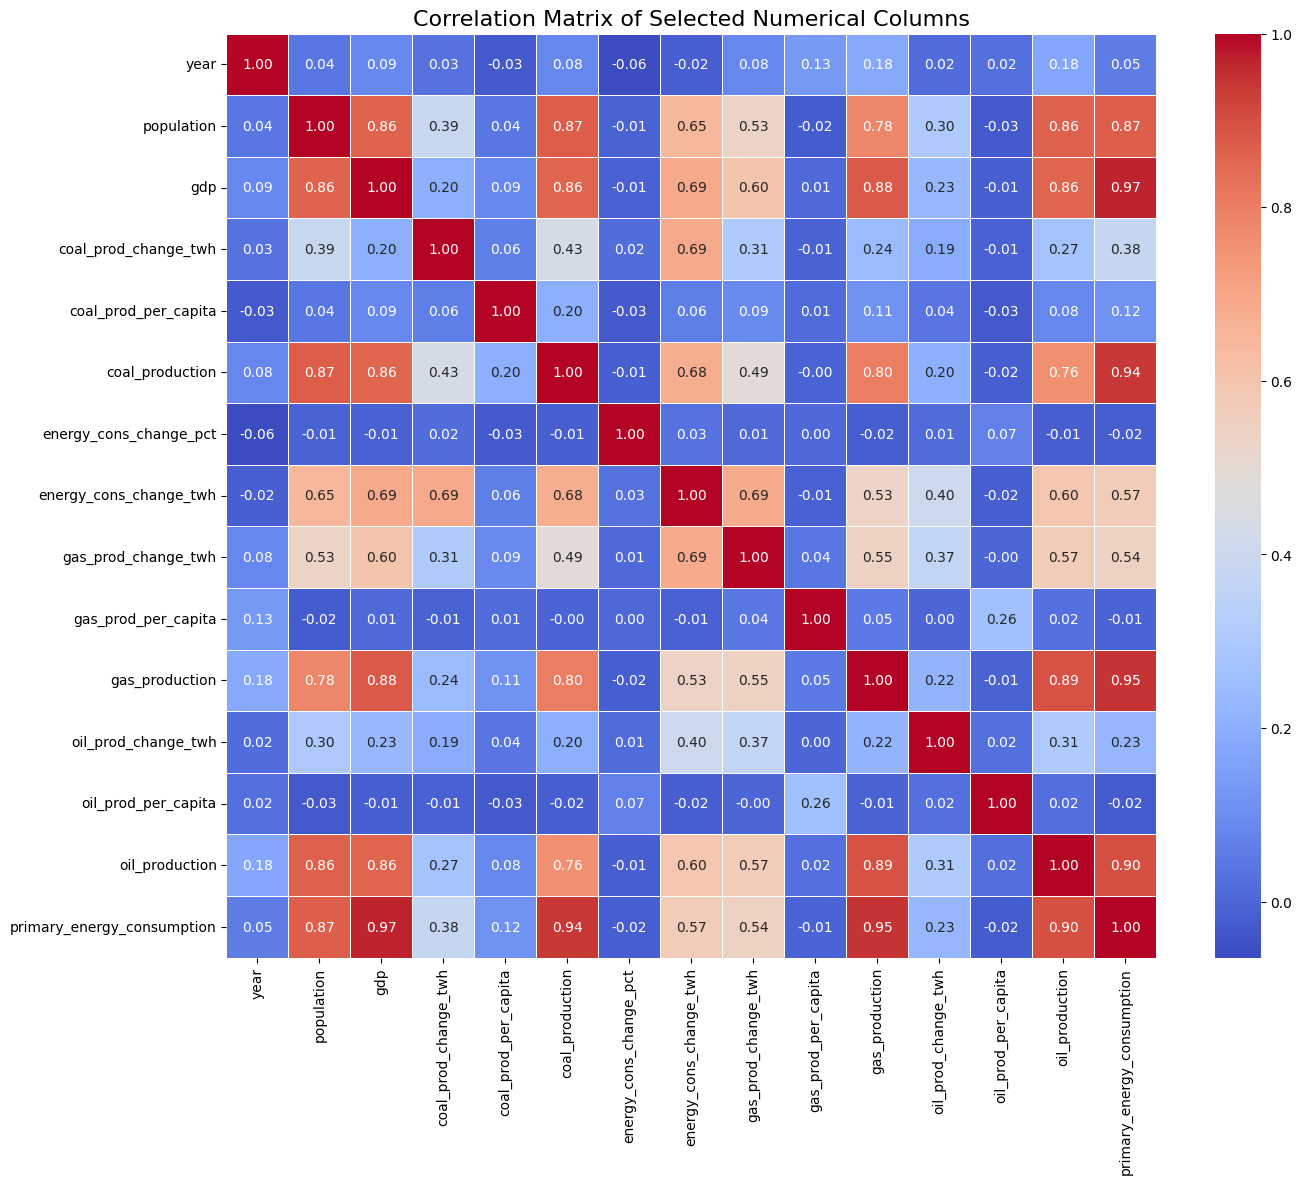

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust figure size for better readability
plt.figure(figsize=(15, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the heatmap
plt.title('Correlation Matrix of Selected Numerical Columns', fontsize=16)

# Display the plot
plt.show()

## Interpret the correlation matrix

### Subtask:
Explain how to interpret the correlation matrix and identify highly correlated variables.


**Reasoning**:
Explain how to interpret the correlation matrix and identify highly correlated variables based on the previously generated heatmap.



In [ ]:
print("Interpreting the Correlation Matrix Heatmap:\n")

print("The heatmap visualizes the pairwise correlation coefficients between the selected numerical columns.")
print("Each cell in the heatmap represents the correlation between two variables.")
print("The color of the cell indicates the strength and direction of the correlation:")
print("- Values close to +1 (typically shown in warmer colors like red) indicate a strong positive linear correlation.")
print("- Values close to -1 (typically shown in cooler colors like blue) indicate a strong negative linear correlation.")
print("- Values close to 0 (typically shown in a neutral color like white) indicate a weak or no linear correlation.\n")

print("Identifying Highly Correlated Variables:")
print("Highly correlated variables are those with absolute correlation coefficients close to 1 (e.g., >= 0.7 or <= -0.7).")
print("We can observe the heatmap to find cells with intense colors (either strongly red or strongly blue).\n")

print("Observations from the Heatmap:")

# Find pairs with high absolute correlation (excluding the diagonal)
high_corr_threshold = 0.7
high_corr_pairs = []

# Iterate through the upper triangle of the correlation matrix (excluding diagonal)
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]

        if abs(correlation_value) >= high_corr_threshold:
            high_corr_pairs.append((col1, col2, correlation_value))

# Sort by absolute correlation value in descending order
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if high_corr_pairs:
    print("Pairs of variables with high absolute correlation (>= 0.7 or <= -0.7):")
    for col1, col2, corr_value in high_corr_pairs:
        print(f"- {col1} and {col2}: {corr_value:.2f}")

    print("\nInterpretation of High Correlation:")
    print("A high positive correlation (close to +1) suggests that as the values of one variable increase, the values of the other variable also tend to increase.")
    print("A high negative correlation (close to -1) suggests that as the values of one variable increase, the values of the other variable tend to decrease.")
    print("In the context of energy data, high positive correlations between different energy sources (e.g., coal production and overall primary energy consumption) might indicate reliance on those sources.")
    print("High correlations between economic indicators (like GDP and population) and energy metrics might highlight the link between economic activity/population size and energy demand/supply.")
else:
    print("No pairs of variables with absolute correlation >= 0.7 or <= -0.7 found.")

print("\nVariables with Low Correlation:")
print("Variables with low correlation coefficients (close to 0) with most other variables do not exhibit a strong linear relationship with those variables.")
print("This doesn't necessarily mean there is no relationship, but it suggests the relationship is not strongly linear.")
# You can visually inspect the heatmap for rows/columns with mostly neutral colors to identify variables with low overall correlation.
print("Visually inspect the heatmap for rows or columns that appear mostly neutral in color to identify variables with generally low correlations.")

Interpreting the Correlation Matrix Heatmap:

The heatmap visualizes the pairwise correlation coefficients between the selected numerical columns.
Each cell in the heatmap represents the correlation between two variables.
The color of the cell indicates the strength and direction of the correlation:
- Values close to +1 (typically shown in warmer colors like red) indicate a strong positive linear correlation.
- Values close to -1 (typically shown in cooler colors like blue) indicate a strong negative linear correlation.
- Values close to 0 (typically shown in a neutral color like white) indicate a weak or no linear correlation.

Identifying Highly Correlated Variables:
Highly correlated variables are those with absolute correlation coefficients close to 1 (e.g., >= 0.7 or <= -0.7).
We can observe the heatmap to find cells with intense colors (either strongly red or strongly blue).

Observations from the Heatmap:
Pairs of variables with high absolute correlation (>= 0.7 or <= -0.7):
- g

In [ ]:
print(f"Number of countries in country_dataframes: {len(country_dataframes)}")
print(f"\nCountries with data:")
for country in country_dataframes.keys():
    print(f"  {country}: {len(country_dataframes[country])} rows")

Number of countries in country_dataframes: 219

Countries with data:
  Algeria: 123 rows
  Argentina: 123 rows
  Angola: 123 rows
  Australia: 123 rows
  Belgium: 123 rows
  Brazil: 123 rows
  Bolivia: 123 rows
  Bangladesh: 123 rows
  Austria: 123 rows
  Bahrain: 123 rows
  Brunei: 123 rows
  Gabon: 123 rows
  France: 123 rows
  Greece: 123 rows
  Germany: 123 rows
  Hungary: 123 rows
  Ecuador: 123 rows
  Egypt: 123 rows
  Denmark: 123 rows
  Congo: 123 rows
  China: 123 rows
  Chile: 123 rows
  Colombia: 123 rows
  Burundi: 123 rows
  Canada: 123 rows
  Bulgaria: 123 rows
  India: 123 rows
  Peru: 123 rows
  Philippines: 123 rows
  Poland: 123 rows
  Portugal: 123 rows
  Qatar: 123 rows
  Romania: 123 rows
  Spain: 123 rows
  Saudi Arabia: 123 rows
  South Africa: 123 rows
  South Korea: 123 rows
  Turkey: 123 rows
  Pakistan: 123 rows
  Norway: 123 rows
  Oman: 123 rows
  Nigeria: 123 rows
  New Zealand: 123 rows
  Mexico: 123 rows
  Mongolia: 123 rows
  Myanmar: 123 rows
  United 

## Summary:

### Data Analysis Key Findings

*   127 numerical columns were initially identified in the dataset.
*   After filtering out columns with more than 50% missing values, 15 numerical columns remained, resulting in the removal of 112 columns.
*   The pairwise correlation matrix was computed for the filtered numerical columns.
*   The correlation matrix was visualized as a heatmap for easier interpretation.
*   Several pairs of variables showed high positive correlations (>= 0.7), including:
    *   `gdp` and `primary_energy_consumption` (0.97)
    *   `gas_production` and `primary_energy_consumption` (0.95)
    *   `coal_production` and `primary_energy_consumption` (0.94)
    *   `oil_production` and `primary_energy_consumption` (0.90)
    *   `gas_production` and `oil_production` (0.89)
    *   `gdp` and `gas_production` (0.88)
    *   `population` and `coal_production` (0.87)
    *   `population` and `primary_energy_consumption` (0.87)
    *   `population` and `oil_production` (0.86)
    *   `population` and `gdp` (0.86)
    *   `gdp` and `coal_production` (0.86)
    *   `gdp` and `oil_production` (0.86)
    *   `coal_production` and `gas_production` (0.80)
    *   `population` and `gas_production` (0.78)
    *   `coal_production` and `oil_production` (0.76)

### Insights or Next Steps

*   The high correlations between economic indicators (like GDP and population) and various energy production/consumption metrics suggest a strong link between economic activity and energy dynamics in this dataset.
*   Investigating the drivers behind the high correlations among different energy sources (e.g., `gas_production`, `coal_production`, `oil_production`) could provide insights into the energy mix and interdependencies.


Top 10 countries by total energy consumption:
['China', 'United States', 'Russia', 'India', 'Japan', 'Canada', 'Germany', 'Brazil', 'South Korea', 'France']


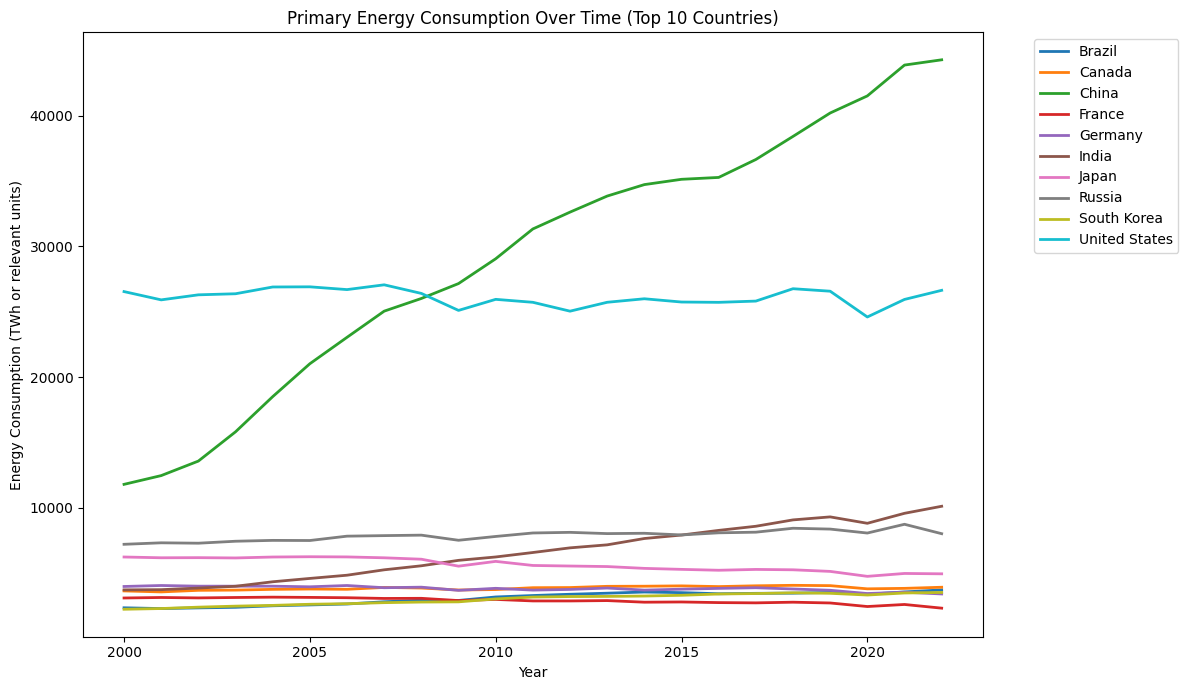

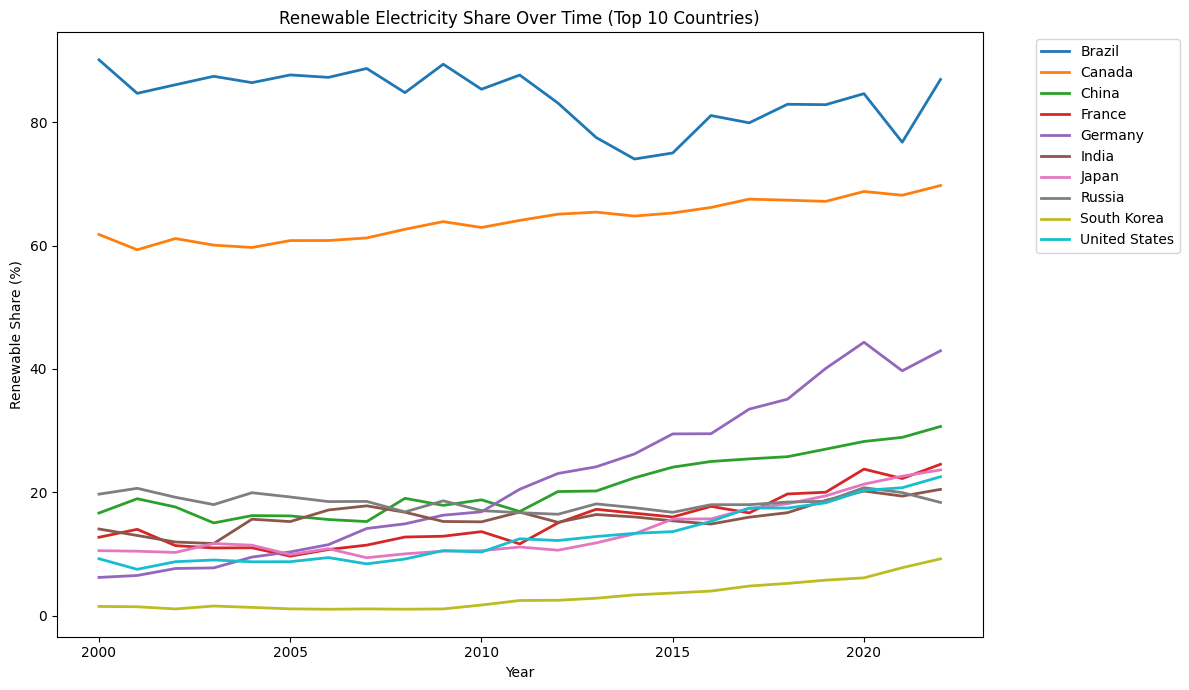

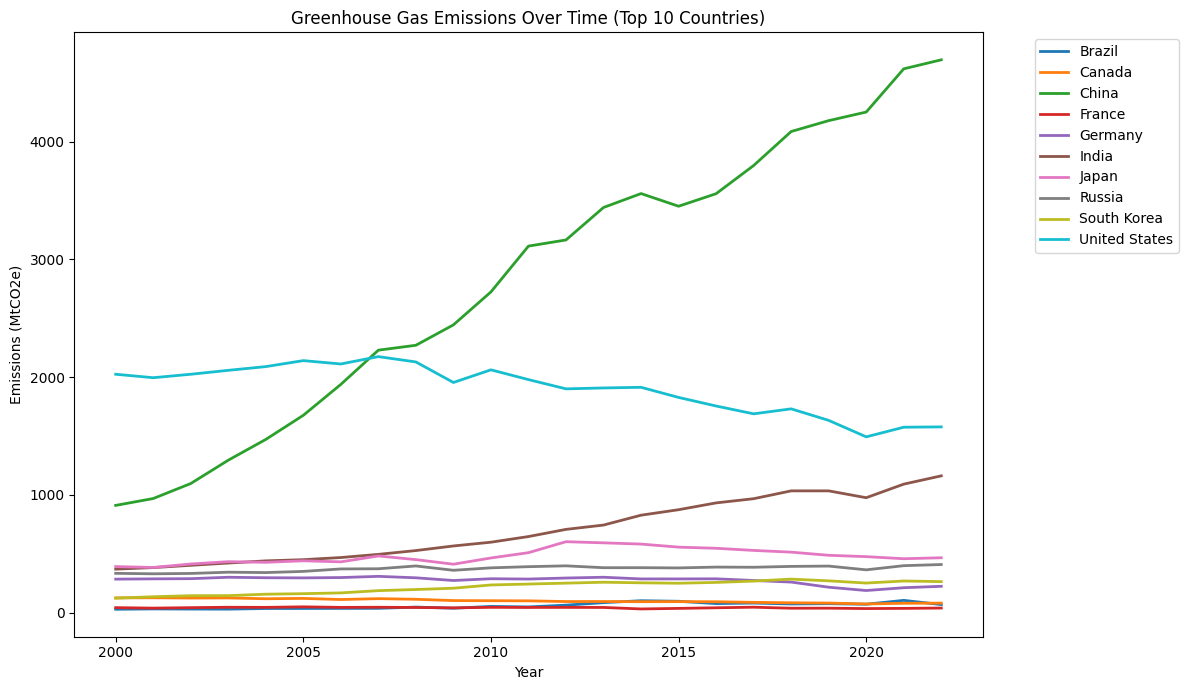

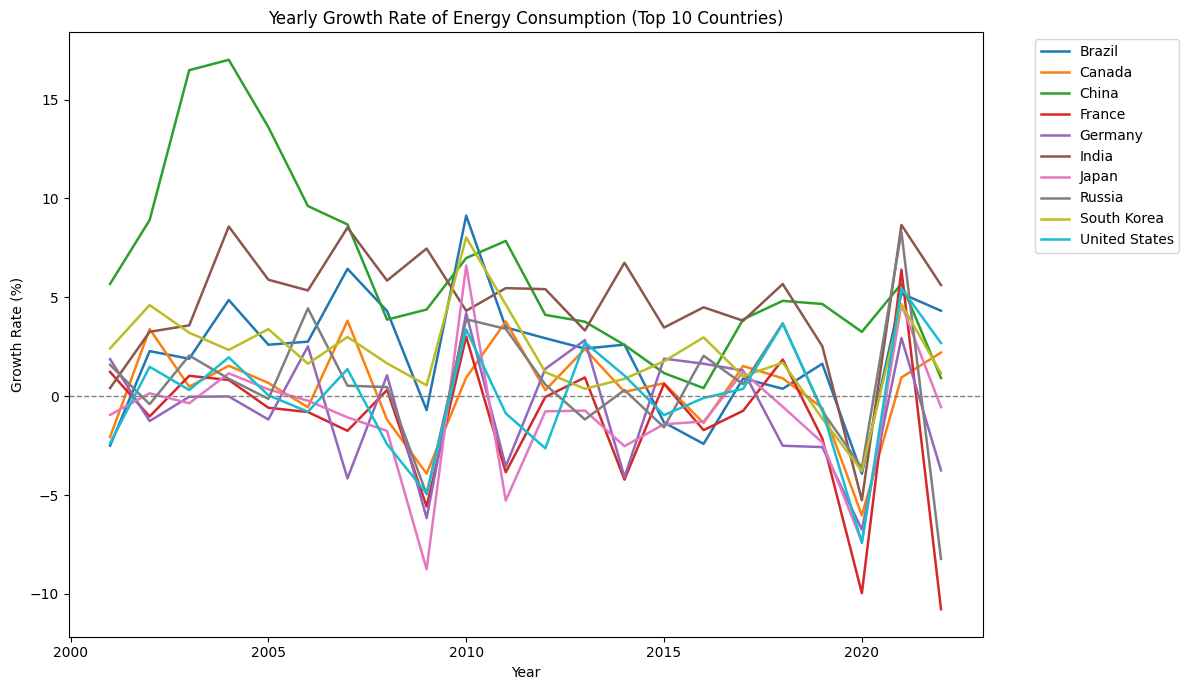

In [ ]:
# 📊 Country-Level Comparative Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select relevant columns (adjust names if needed)
# Check the available columns in df_clean to find suitable alternatives
# print(df_clean.columns.tolist()) # Uncomment to see all columns
cols_needed = [
    'country', 'year',
    'primary_energy_consumption',
    'renewables_share_elec', # Using 'renewables_share_elec' as an alternative
    'greenhouse_gas_emissions' # Using 'greenhouse_gas_emissions' as an alternative for CO2
]

# Keep only rows with non-missing values in these columns
df_energy = df_clean[cols_needed].dropna()

# Identify top 10 countries by total energy consumption
top_countries = (
    df_energy.groupby('country')['primary_energy_consumption']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df_energy[df_energy['country'].isin(top_countries)].copy() # Explicitly create a copy

print("Top 10 countries by total energy consumption:")
print(top_countries.tolist())
# 1️ Energy consumption over time
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_top,
    x='year', y='primary_energy_consumption',
    hue='country', linewidth=2
)
plt.title("Primary Energy Consumption Over Time (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh or relevant units)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 2️ Renewable electricity share over time

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_top,
    x='year', y='renewables_share_elec', # Changed to 'renewables_share_elec'
    hue='country', linewidth=2
)
plt.title("Renewable Electricity Share Over Time (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Renewable Share (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3️ CO₂ emissions over time
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_top,
    x='year', y='greenhouse_gas_emissions', # Changed to 'greenhouse_gas_emissions'
    hue='country', linewidth=2
)
plt.title("Greenhouse Gas Emissions Over Time (Top 10 Countries)") # Changed title
plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2e)") # Adjusted ylabel
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4️ Yearly growth rate of energy consumption

# Compute percentage change by country
df_top['energy_growth_rate'] = df_top.groupby('country')['primary_energy_consumption'].pct_change() * 100

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_top,
    x='year', y='energy_growth_rate',
    hue='country', linewidth=1.8
)
plt.title("Yearly Growth Rate of Energy Consumption (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

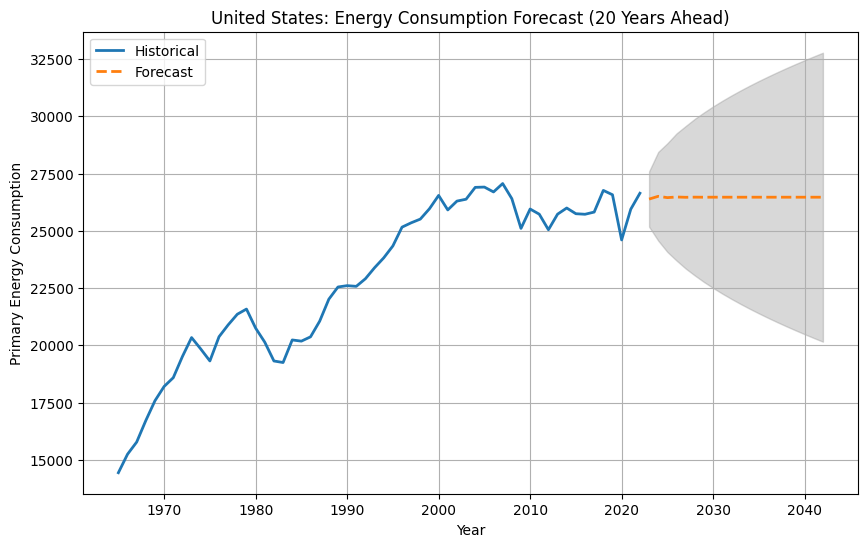

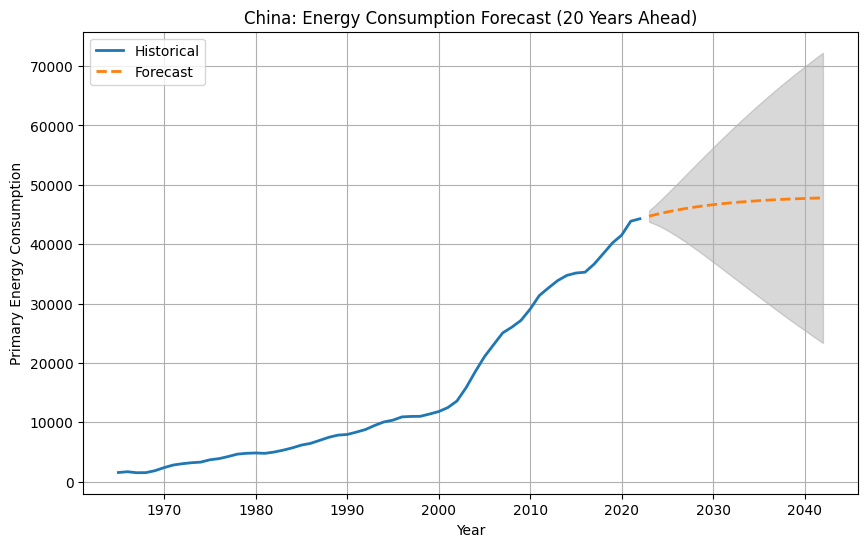

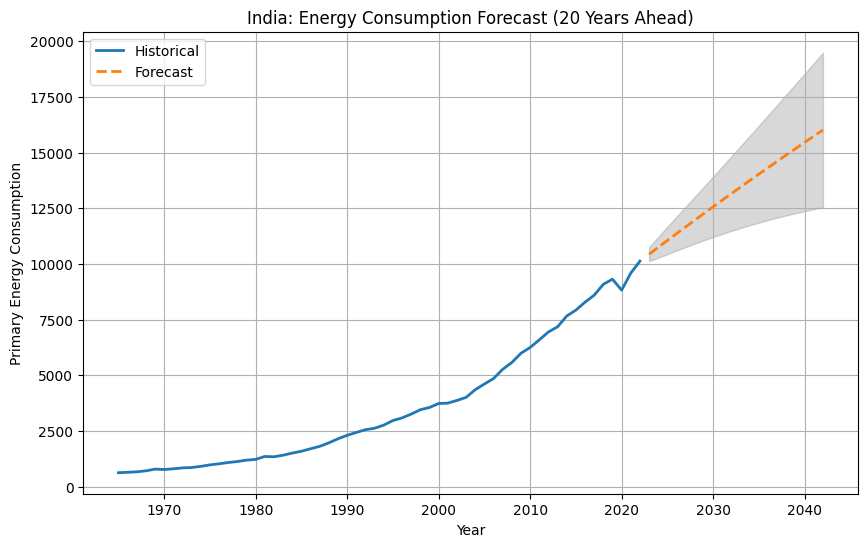

In [ ]:
# 🚀 Clean ARIMA Forecasting (No More Warnings)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

countries_to_forecast = ['United States', 'China', 'India']
forecast_years = 20

def forecast_country(country, order=(1,1,1)):
    data = (
        df_clean[df_clean['country'] == country]
        .sort_values('year')[['year', 'primary_energy_consumption']]
        .dropna()
    )
    if len(data) < 10:
        print(f"⚠️ Skipping {country}: insufficient data ({len(data)} points)")
        return None

    # Use datetime index with yearly frequency
    data['date'] = pd.to_datetime(data['year'], format='%Y')
    data = data.set_index('date').asfreq('YS')
    series = data['primary_energy_consumption']

    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()

    # Forecast into the future
    forecast_res = model_fit.get_forecast(steps=forecast_years)
    forecast_mean = forecast_res.predicted_mean
    conf_int = forecast_res.conf_int()

    # Build date index for future years
    future_dates = pd.date_range(
        start=series.index[-1] + pd.offsets.YearBegin(),
        periods=forecast_years, freq='YS'
    )
    forecast_mean.index = future_dates
    conf_int.index = future_dates

    # Plot results
    plt.figure(figsize=(10,6))
    plt.plot(series.index.year, series, label='Historical', linewidth=2)
    plt.plot(forecast_mean.index.year, forecast_mean, '--', label='Forecast', linewidth=2)
    plt.fill_between(
        forecast_mean.index.year,
        conf_int.iloc[:, 0],
        conf_int.iloc[:, 1],
        color='gray', alpha=0.3
    )
    plt.title(f'{country}: Energy Consumption Forecast ({forecast_years} Years Ahead)')
    plt.xlabel('Year')
    plt.ylabel('Primary Energy Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast_mean, conf_int

# Run forecasts
forecast_results = {}
for country in countries_to_forecast:
    forecast = forecast_country(country)
    if forecast:
        forecast_results[country] = forecast


In [ ]:
#Build modelling dataframe: time + other factors

# Work from df_clean
df_model = df_clean.copy()

# We need primary_energy_consumption and some predictors
if "primary_energy_consumption" not in df_model.columns:
    raise ValueError("primary_energy_consumption column not found in df_clean")

# Sort and add 1-year lag of primary energy per country
df_model = df_model.sort_values(["country", "year"])
df_model["primary_energy_lag1"] = df_model.groupby("country")["primary_energy_consumption"].shift(1)

# Candidate numeric predictors (only keep what actually exists)
candidate_features = [
    "year",
    "primary_energy_lag1",
    "population",
    "gdp",
    "gdp_per_capita",
    "renewables_share_elec",
    "greenhouse_gas_emissions"
]

feature_cols = [c for c in candidate_features if c in df_model.columns]
print("Using these feature columns:", feature_cols)

target_col = "primary_energy_consumption"

# Drop rows with missing target or any missing feature
df_model = df_model.dropna(subset=feature_cols + [target_col]).copy()
print("Modelling dataframe shape:", df_model.shape)

df_model[["country", "year"] + feature_cols + [target_col]].head()


Using these feature columns: ['year', 'primary_energy_lag1', 'population', 'gdp', 'renewables_share_elec', 'greenhouse_gas_emissions']
Modelling dataframe shape: (3120, 130)


country  year  year  primary_energy_lag1  population           gdp  \
123  Afghanistan  2000  2000                6.749  19542986.0  1.128379e+10   
124  Afghanistan  2001  2001                5.914  19688634.0  1.102127e+10   
125  Afghanistan  2002  2002                4.664  21000258.0  1.880487e+10   
126  Afghanistan  2003  2003                4.428  22645136.0  2.107434e+10   
127  Afghanistan  2004  2004                5.208  23553554.0  2.233257e+10   

     renewables_share_elec  greenhouse_gas_emissions  \
123                 65.957                      0.12   
124                 84.746                      0.07   
125                 81.159                      0.10   
126                 67.021                      0.24   
127                 62.921                      0.24   

     primary_energy_consumption  
123                       5.914  
124                       4.664  
125                       4.428  
126                       5.208  
127                       4.810

In [ ]:

#  Time-based train/test split
min_year = df_model["year"].min()
max_year = df_model["year"].max()
print("Year range in modelling data:", min_year, "->", max_year)

# Use the last N years as test set (e.g. last 5 years)
test_years = 5
cutoff_year = max_year - test_years
print("Training on years <=", cutoff_year, "testing on years >", cutoff_year)

train_mask = df_model["year"] <= cutoff_year
test_mask  = df_model["year"] > cutoff_year

train_data = df_model[train_mask]
test_data  = df_model[test_mask]

X_train = train_data[feature_cols]
y_train = train_data[target_col]

X_test = test_data[feature_cols]
y_test = test_data[target_col]

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Year range in modelling data: 2000 -> 2018
Training on years <= 2013 testing on years > 2013
Train size: 2295 Test size: 825


In [ ]:
#Train models and evaluate


models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    results.append({
        "model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results)
print("\nModel performance on held-out future years:")
print(results_df)



Training LinearRegression...

Training RandomForest...

Model performance on held-out future years:
              model        MAE        RMSE        R2
0  LinearRegression  31.305557  104.107108  0.999158
1      RandomForest  70.977851  445.611562  0.984582



Random Forest feature importances:
                    feature  importance
1       primary_energy_lag1    0.434321
5  greenhouse_gas_emissions    0.312256
3                       gdp    0.249579
2                population    0.002513
4     renewables_share_elec    0.000804
0                      year    0.000527


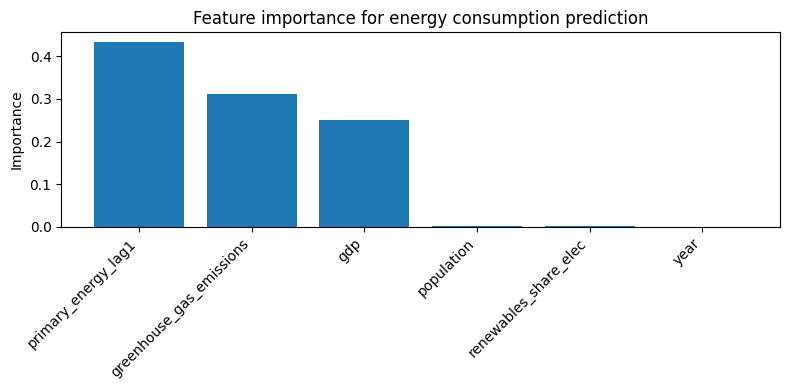

In [ ]:
# Feature importance from Random Forest
rf = models["RandomForest"]
rf.fit(X_train, y_train)
importances = rf.feature_importances_

fi_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nRandom Forest feature importances:")
print(fi_df)

plt.figure(figsize=(8, 4))
plt.bar(fi_df["feature"], fi_df["importance"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Feature importance for energy consumption prediction")
plt.tight_layout()
plt.show()


In [ ]:

# Helper: forecast for one country using time + other factors
# Pick the best model based on RMSE
best_model_name = results_df.sort_values("RMSE").iloc[0]["model"]
best_model = models[best_model_name]
print("\nBest model selected for forecasting:", best_model_name)

def forecast_country_multivariate(country_name, horizon=10):
    """
    Forecast primary energy consumption for one country using
    the trained regression model with:
      - year
      - primary_energy_lag1
      - other numeric factors (population, gdp, etc.)
    """
    cdf = df_model[df_model["country"] == country_name].sort_values("year").copy()
    if cdf.empty:
        print(f"No data for {country_name}")
        return None

    # Use the last available row as the starting point
    last_row = cdf.iloc[-1].copy()
    last_year = int(last_row["year"])
    last_energy = float(last_row[target_col])

    # Build a base feature vector from last row
    base_features = {}
    for f in feature_cols:
        base_features[f] = last_row.get(f, np.nan)

    # Make sure primary_energy_lag1 is last known energy
    base_features["primary_energy_lag1"] = last_energy

    forecasts = []
    for step in range(1, horizon + 1):
        year = last_year + step
        base_features["year"] = year

        # Construct X row in correct order
        X_input = np.array([[base_features[f] for f in feature_cols]])
        y_hat = float(best_model.predict(X_input)[0])

        forecasts.append({"country": country_name,
                          "year": year,
                          "forecast_energy": y_hat})

        # Update lag for next step
        base_features["primary_energy_lag1"] = y_hat

    return pd.DataFrame(forecasts)



Best model selected for forecasting: LinearRegression


In [ ]:
# Build multivariate forecasts for ALL countries with data

all_countries = sorted(df_model["country"].unique())
horizon = 20  # forecast years ahead

multi_forecasts = []

for c in all_countries:
    fdf = forecast_country_multivariate(c, horizon=horizon)
    if fdf is not None and not fdf.empty:
        multi_forecasts.append(fdf)

multi_forecasts_df = pd.concat(multi_forecasts, ignore_index=True)

print("Number of countries in multivariate forecasts:",
      multi_forecasts_df["country"].nunique())
multi_forecasts_df.head()




Number of countries in multivariate forecasts: 165


country  year  forecast_energy
0  Afghanistan  2019        54.464642
1  Afghanistan  2020        75.600586
2  Afghanistan  2021        97.325303
3  Afghanistan  2022       119.648419
4  Afghanistan  2023       142.579716

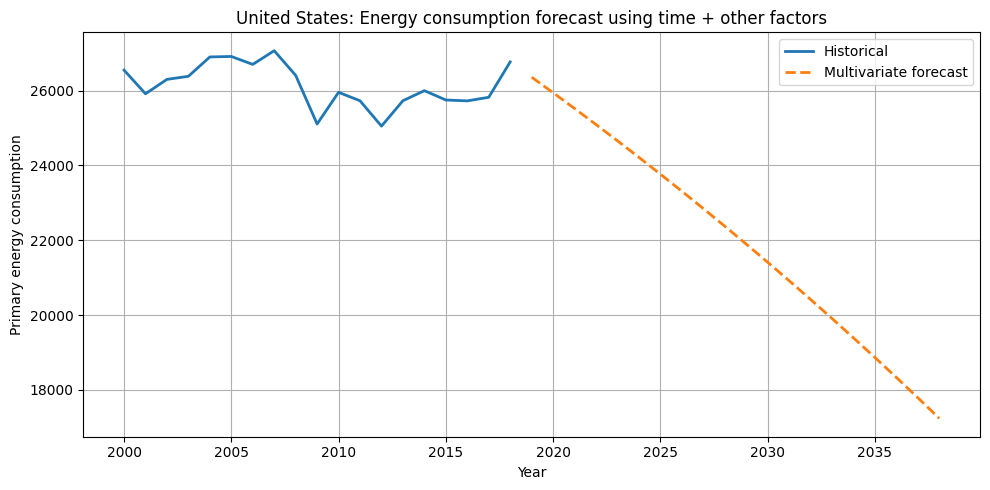

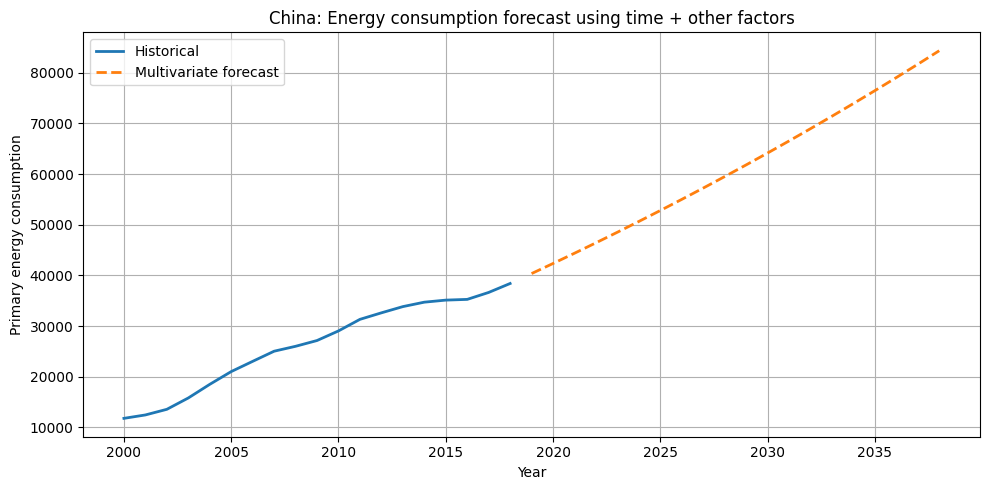

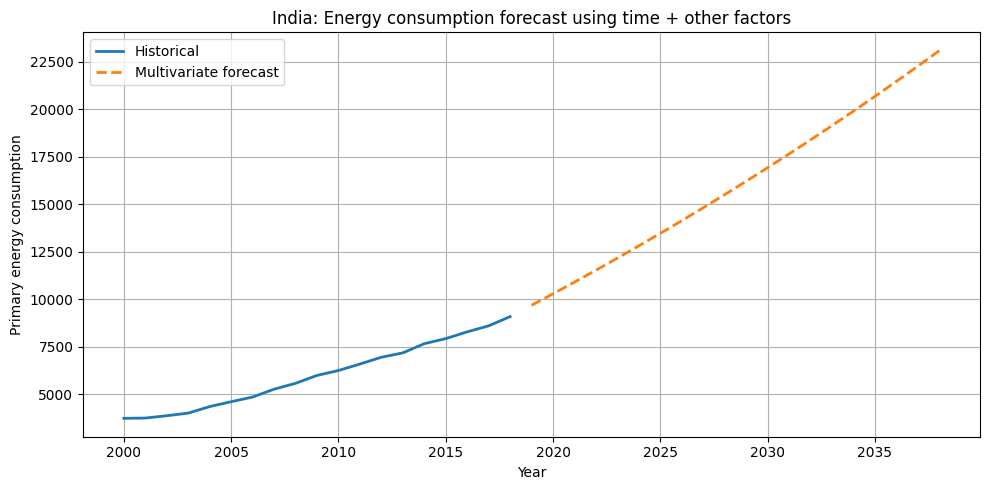

In [ ]:
#  Plot historical vs multivariate-forecast for each country


for c in countries_to_forecast:
    hist = df_model[df_model["country"] == c].sort_values("year")
    fut  = multi_forecasts_df[multi_forecasts_df["country"] == c].sort_values("year")

    plt.figure(figsize=(10, 5))
    plt.plot(hist["year"], hist[target_col], label="Historical", linewidth=2)
    plt.plot(fut["year"], fut["forecast_energy"], "--", label="Multivariate forecast", linewidth=2)
    plt.title(f"{c}: Energy consumption forecast using time + other factors")
    plt.xlabel("Year")
    plt.ylabel("Primary energy consumption")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import plotly.graph_objects as go
# Interactive Plotly dropdown for multivariate forecast
# Make sure years are numeric
df_model["year"] = df_model["year"].astype(int)
multi_forecasts_df["year"] = multi_forecasts_df["year"].astype(int)

countries = sorted(multi_forecasts_df["country"].unique())

fig = go.Figure()

# We will add 2 traces per country: historical + forecast
visibility = []

for i, country in enumerate(countries):
    hist = df_model[df_model["country"] == country].sort_values("year")
    fut  = multi_forecasts_df[multi_forecasts_df["country"] == country].sort_values("year")

    # Historical trace
    fig.add_trace(go.Scatter(
        x=hist["year"],
        y=hist["primary_energy_consumption"],
        mode="lines+markers",
        name=f"{country} - Historical",
        visible=(i == 0)  # only first country visible at start
    ))
    visibility.append(i == 0)

    # Forecast trace
    fig.add_trace(go.Scatter(
        x=fut["year"],
        y=fut["forecast_energy"],
        mode="lines+markers",
        line=dict(dash="dash"),
        name=f"{country} - Forecast",
        visible=(i == 0)
    ))
    visibility.append(i == 0)

# Build dropdown menu: one button per country
buttons = []
for i, country in enumerate(countries):
    # For each country, set visible=True only for its two traces
    vis = [False] * (2 * len(countries))
    vis[2*i] = True      # historical trace
    vis[2*i + 1] = True  # forecast trace

    buttons.append(dict(
        label=country,
        method="update",
        args=[{"visible": vis},
              {"title": f"Energy consumption forecast (time + factors): {country}"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=0.0,
            y=1.15,
            xanchor="left",
            yanchor="top"
        )
    ],
    title=f"Energy consumption forecast (time + factors): {countries[0]}",
    xaxis_title="Year",
    yaxis_title="Primary energy consumption",
    legend=dict(orientation="h", y=-0.2)
)

fig.show()


In [ ]:



import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output
# STEP 1: Create Interactive Choropleth Map with Dropdown

def create_interactive_energy_map():
    # Get most recent year data for the map
    most_recent_year = df_clean['year'].max()
    map_data = df_clean[df_clean['year'] == most_recent_year].copy()
    map_data = map_data.dropna(subset=['iso_code', 'primary_energy_consumption'])

    # Create the choropleth map
    fig_map = px.choropleth(
        map_data,
        locations="iso_code",
        color="primary_energy_consumption",
        hover_name="country",
        hover_data={
            "primary_energy_consumption": ":.2f",
            "population": ":.0f",
            "gdp": ":.2f"
        },
        color_continuous_scale="Viridis",
        projection="natural earth",
        title=f"Global Primary Energy Consumption ({most_recent_year})",
        labels={"primary_energy_consumption": "Energy (TWh)"}
    )

    fig_map.update_layout(height=500)

    return fig_map


# STEP 2: Function to Generate All Plots for a Selected Country

def generate_all_country_plots(country_name):


    print(f"\n{'='*70}")
    print(f"📊 COMPREHENSIVE ANALYSIS FOR: {country_name}")
    print(f"{'='*70}\n")

    # Check if country exists
    if country_name not in country_dataframes:
        print(f"❌ No data available for {country_name}")
        return

    country_df = country_dataframes[country_name]

    # PLOT 1: All Energy Metrics Over Time
    print("🔹 Generating historical energy metrics...")

    metrics_to_plot = [col for col in relevant_columns if col in country_df.columns
                       and not country_df[col].dropna().empty]

    if metrics_to_plot:
        n_metrics = len(metrics_to_plot)
        n_cols = 2
        n_rows = (n_metrics + 1) // 2

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
        axes = axes.flatten() if n_metrics > 1 else [axes]

        for idx, col in enumerate(metrics_to_plot):
            ax = axes[idx]
            data = country_df[['year', col]].dropna()
            ax.plot(data['year'], data[col], linewidth=2, color='steelblue')
            ax.set_title(f'{col}', fontsize=11, fontweight='bold')
            ax.set_xlabel('Year')
            ax.set_ylabel(col)
            ax.grid(True, alpha=0.3)

        # Hide unused subplots
        for idx in range(n_metrics, len(axes)):
            axes[idx].axis('off')

        plt.suptitle(f'{country_name} - All Energy Metrics Over Time',
                     fontsize=15, fontweight='bold', y=1.0)
        plt.tight_layout()
        plt.show()


    # PLOT 2: Multivariate Forecast (Your ML Model)
    print("🔹 Generating multivariate forecast (ML model)...")

    if country_name in df_model['country'].values:
        hist = df_model[df_model["country"] == country_name].sort_values("year")
        fut = multi_forecasts_df[multi_forecasts_df["country"] == country_name].sort_values("year")

        if not hist.empty and not fut.empty:
            fig, ax = plt.subplots(figsize=(14, 6))

            ax.plot(hist["year"], hist["primary_energy_consumption"],
                   'o-', label="Historical", linewidth=2.5, color='blue', markersize=6)
            ax.plot(fut["year"], fut["forecast_energy"],
                   's--', label="ML Forecast (Time + Factors)", linewidth=2.5, color='red', markersize=6)

            ax.axvline(x=hist["year"].max(), color="gray", linestyle=":", linewidth=2)
            ax.fill_between(fut["year"], 0, fut["forecast_energy"], alpha=0.15, color='red')

            ax.set_title(f'{country_name} - Multivariate Energy Consumption Forecast',
                        fontsize=14, fontweight='bold')
            ax.set_xlabel("Year", fontsize=12)
            ax.set_ylabel("Primary Energy Consumption", fontsize=12)
            ax.legend(fontsize=11)
            ax.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

            # Print forecast values
            print(f"\n📈 Forecast Values for {country_name}:")
            print(fut[['year', 'forecast_energy']].to_string(index=False))


    # PLOT 3: ARIMA Forecast
    print("🔹 Generating ARIMA forecast...")

    data = (
        df_clean[df_clean['country'] == country_name]
        .sort_values('year')[['year', 'primary_energy_consumption']]
        .dropna()
    )

    if len(data) >= 10:
        data['date'] = pd.to_datetime(data['year'], format='%Y')
        data = data.set_index('date').asfreq('YS')
        series = data['primary_energy_consumption']

        try:
            model = ARIMA(series, order=(1,1,1))
            model_fit = model.fit()

            forecast_res = model_fit.get_forecast(steps=20)
            forecast_mean = forecast_res.predicted_mean
            conf_int = forecast_res.conf_int()

            future_dates = pd.date_range(
                start=series.index[-1] + pd.offsets.YearBegin(),
                periods=20, freq='YS'
            )
            forecast_mean.index = future_dates
            conf_int.index = future_dates

            plt.figure(figsize=(14, 6))
            plt.plot(series.index.year, series, 'o-', label='Historical',
                    linewidth=2.5, color='blue', markersize=6)
            plt.plot(forecast_mean.index.year, forecast_mean, 's--',
                    label='ARIMA Forecast', linewidth=2.5, color='orange', markersize=6)
            plt.fill_between(
                forecast_mean.index.year,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color='orange', alpha=0.2, label='95% Confidence Interval'
            )
            plt.title(f'{country_name} - ARIMA Energy Consumption Forecast',
                     fontsize=14, fontweight='bold')
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Primary Energy Consumption', fontsize=12)
            plt.legend(fontsize=11)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"⚠️ ARIMA forecast failed: {e}")
    else:
        print(f"⚠️ Insufficient data for ARIMA forecast ({len(data)} points)")

    # SUMMARY STATISTICS
    print(f"\n📊 SUMMARY STATISTICS FOR {country_name}")
    print(f"{'='*70}")

    if 'continent' in country_df.columns:
        print(f"Continent: {country_df['continent'].iloc[0]}")

    if 'wealth_category' in country_df.columns:
        recent_wealth = country_df.sort_values('year').iloc[-1]['wealth_category']
        print(f"Wealth Category (Most Recent): {recent_wealth}")

    recent_data = country_df.sort_values('year').iloc[-1]
    print(f"\nMost Recent Year: {int(recent_data['year'])}")

    if 'primary_energy_consumption' in recent_data:
        print(f"Primary Energy Consumption: {recent_data['primary_energy_consumption']:.2f} TWh")

    if 'population' in recent_data and pd.notna(recent_data['population']):
        print(f"Population: {recent_data['population']:,.0f}")

    if 'gdp' in recent_data and pd.notna(recent_data['gdp']):
        print(f"GDP: ${recent_data['gdp']:,.2f} billion")

    if 'gdp_per_capita' in recent_data and pd.notna(recent_data['gdp_per_capita']):
        print(f"GDP per Capita: ${recent_data['gdp_per_capita']:,.2f}")

    # Similar countries
    if country_name in country_similarities:
        print(f"\n🌍 Similar Countries: {', '.join(country_similarities[country_name][:3])}")

    print(f"\n{'='*70}\n")


# STEP 3: Create Interactive Dashboard with Map + Plots

def create_interactive_dashboard():


    # Get list of all countries
    countries_list = sorted(country_dataframes.keys())

    # Create dropdown widget
    country_dropdown = widgets.Dropdown(
        options=countries_list,
        value=countries_list[0] if countries_list else None,
        description='Country:',
        style={'description_width': '80px'},
        layout=widgets.Layout(width='400px')
    )

    # Create output widgets
    output_map = widgets.Output()
    output_plots = widgets.Output()

    # Display the map once
    with output_map:
        fig_map = create_interactive_energy_map()
        fig_map.show()
        print("\n💡 Use the dropdown below to explore individual countries in detail")

    # Function to update plots when country changes
    def on_country_change(change):
        with output_plots:
            clear_output(wait=True)
            generate_all_country_plots(change['new'])

    # Attach observer to dropdown
    country_dropdown.observe(on_country_change, names='value')

    # Display the complete dashboard
    print("="*80)
    print("🌍 INTERACTIVE GLOBAL ENERGY CONSUMPTION DASHBOARD")
    print("="*80)
    print("\n1. Explore the world map showing energy consumption by country")
    print("2. Select a country from the dropdown to see detailed analysis:")
    print("   - All historical energy metrics")
    print("   - Multivariate forecast (ML model)")
    print("   - ARIMA time series forecast")
    print("   - Summary statistics and similar countries\n")

    display(output_map)
    display(widgets.HBox([widgets.Label("🔍 Select Country for Detailed Analysis:"), country_dropdown]))
    display(output_plots)

    # Generate initial plot
    on_country_change({'new': country_dropdown.value})


# STEP 4: RUN THE DASHBOARD
print("\n" + "="*80)
print("🚀 LAUNCHING INTERACTIVE ENERGY DASHBOARD...")
print("="*80 + "\n")

create_interactive_dashboard()


# ALTERNATIVE: Simple Function-Based Approach (No Widgets)

def explore_country(country_name):
    generate_all_country_plots(country_name)


# Quick test examples
print("\n" + "="*80)
print("💡 You can also use: explore_country('Country Name')")
print("Examples:")
print("  explore_country('United States')")
print("  explore_country('China')")
print("  explore_country('Germany')")
print("="*80)


🚀 LAUNCHING INTERACTIVE ENERGY DASHBOARD...

🌍 INTERACTIVE GLOBAL ENERGY CONSUMPTION DASHBOARD

1. Explore the world map showing energy consumption by country
2. Select a country from the dropdown to see detailed analysis:
   - All historical energy metrics
   - Multivariate forecast (ML model)
   - ARIMA time series forecast
   - Summary statistics and similar countries



Output()

Output()


💡 You can also use: explore_country('Country Name')
Examples:
  explore_country('United States')
  explore_country('China')
  explore_country('Germany')



🚀 LAUNCHING INTERACTIVE ENERGY DASHBOARD




💡 EXPLORE COUNTRIES

Use the function below to explore any country:
   explore_country('United States')
   explore_country('China')
   explore_country('Germany')

Or use the quick buttons below for top countries:


🎯 TOP 20 COUNTRIES - Click to Explore:



GridBox(children=(Button(button_style='info', description='United States', layout=Layout(height='40px', width=…


📌 QUICK START EXAMPLES:

Explore United States:

📊 COMPREHENSIVE ANALYSIS FOR: United States

🌍 COUNTRY STATISTICS
--------------------------------------------------------------------------------
📍 Continent: North America
💰 Wealth Category: Unknown
📅 Most Recent Year: 2022
⚡ Energy Consumption: 26641.77 TWh
👥 Population: 338,289,856
N/A
N/A
🌐 Similar Countries: Mexico, Canada, Guatemala
--------------------------------------------------------------------------------

📈 Generating Primary Energy Consumption Forecast...


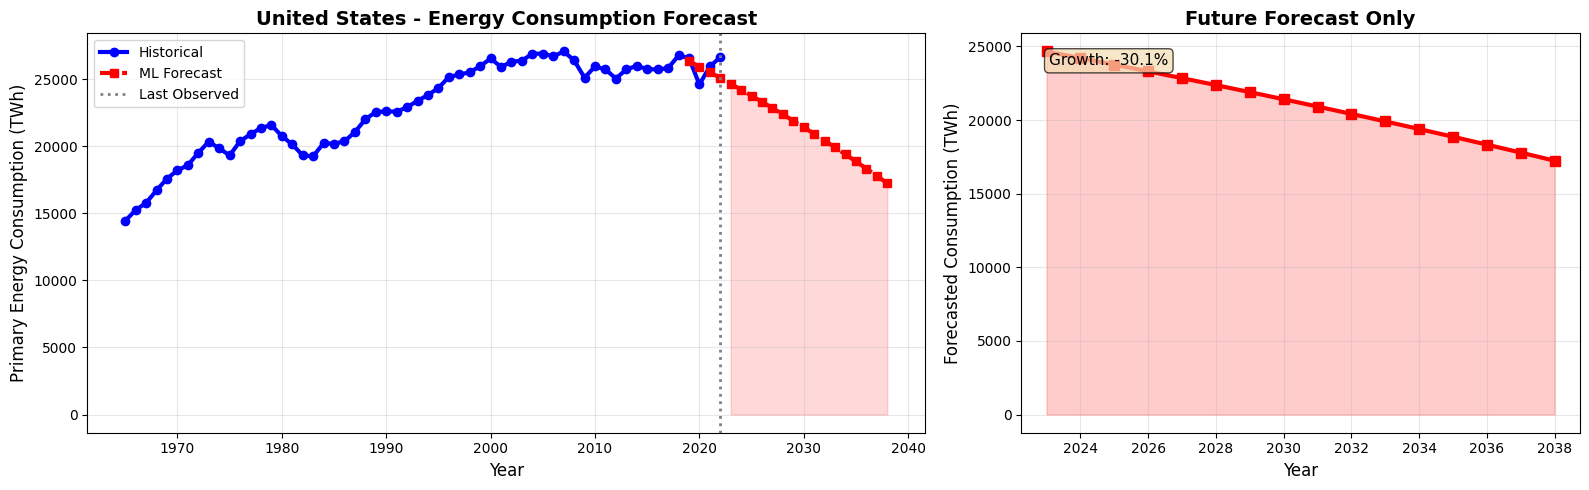

📊 Generating ARIMA Time Series Forecast...


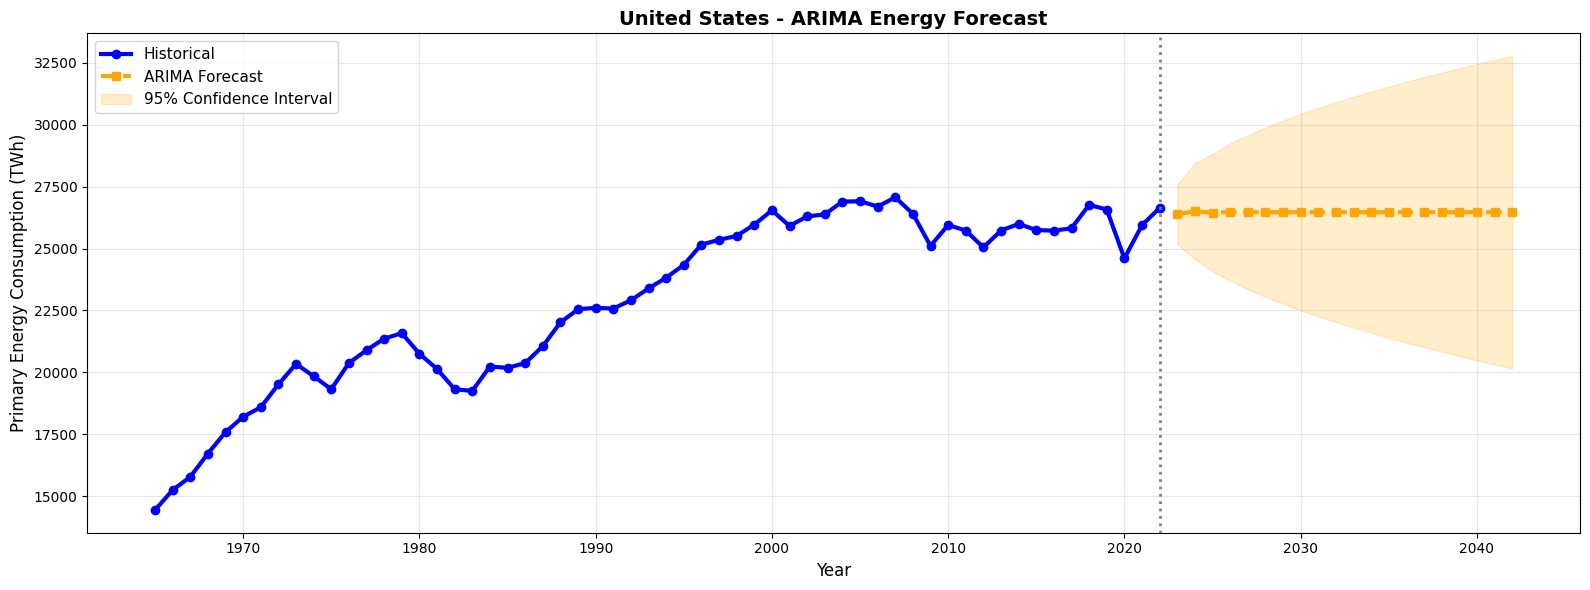

⚙️ Generating All Energy Metrics...


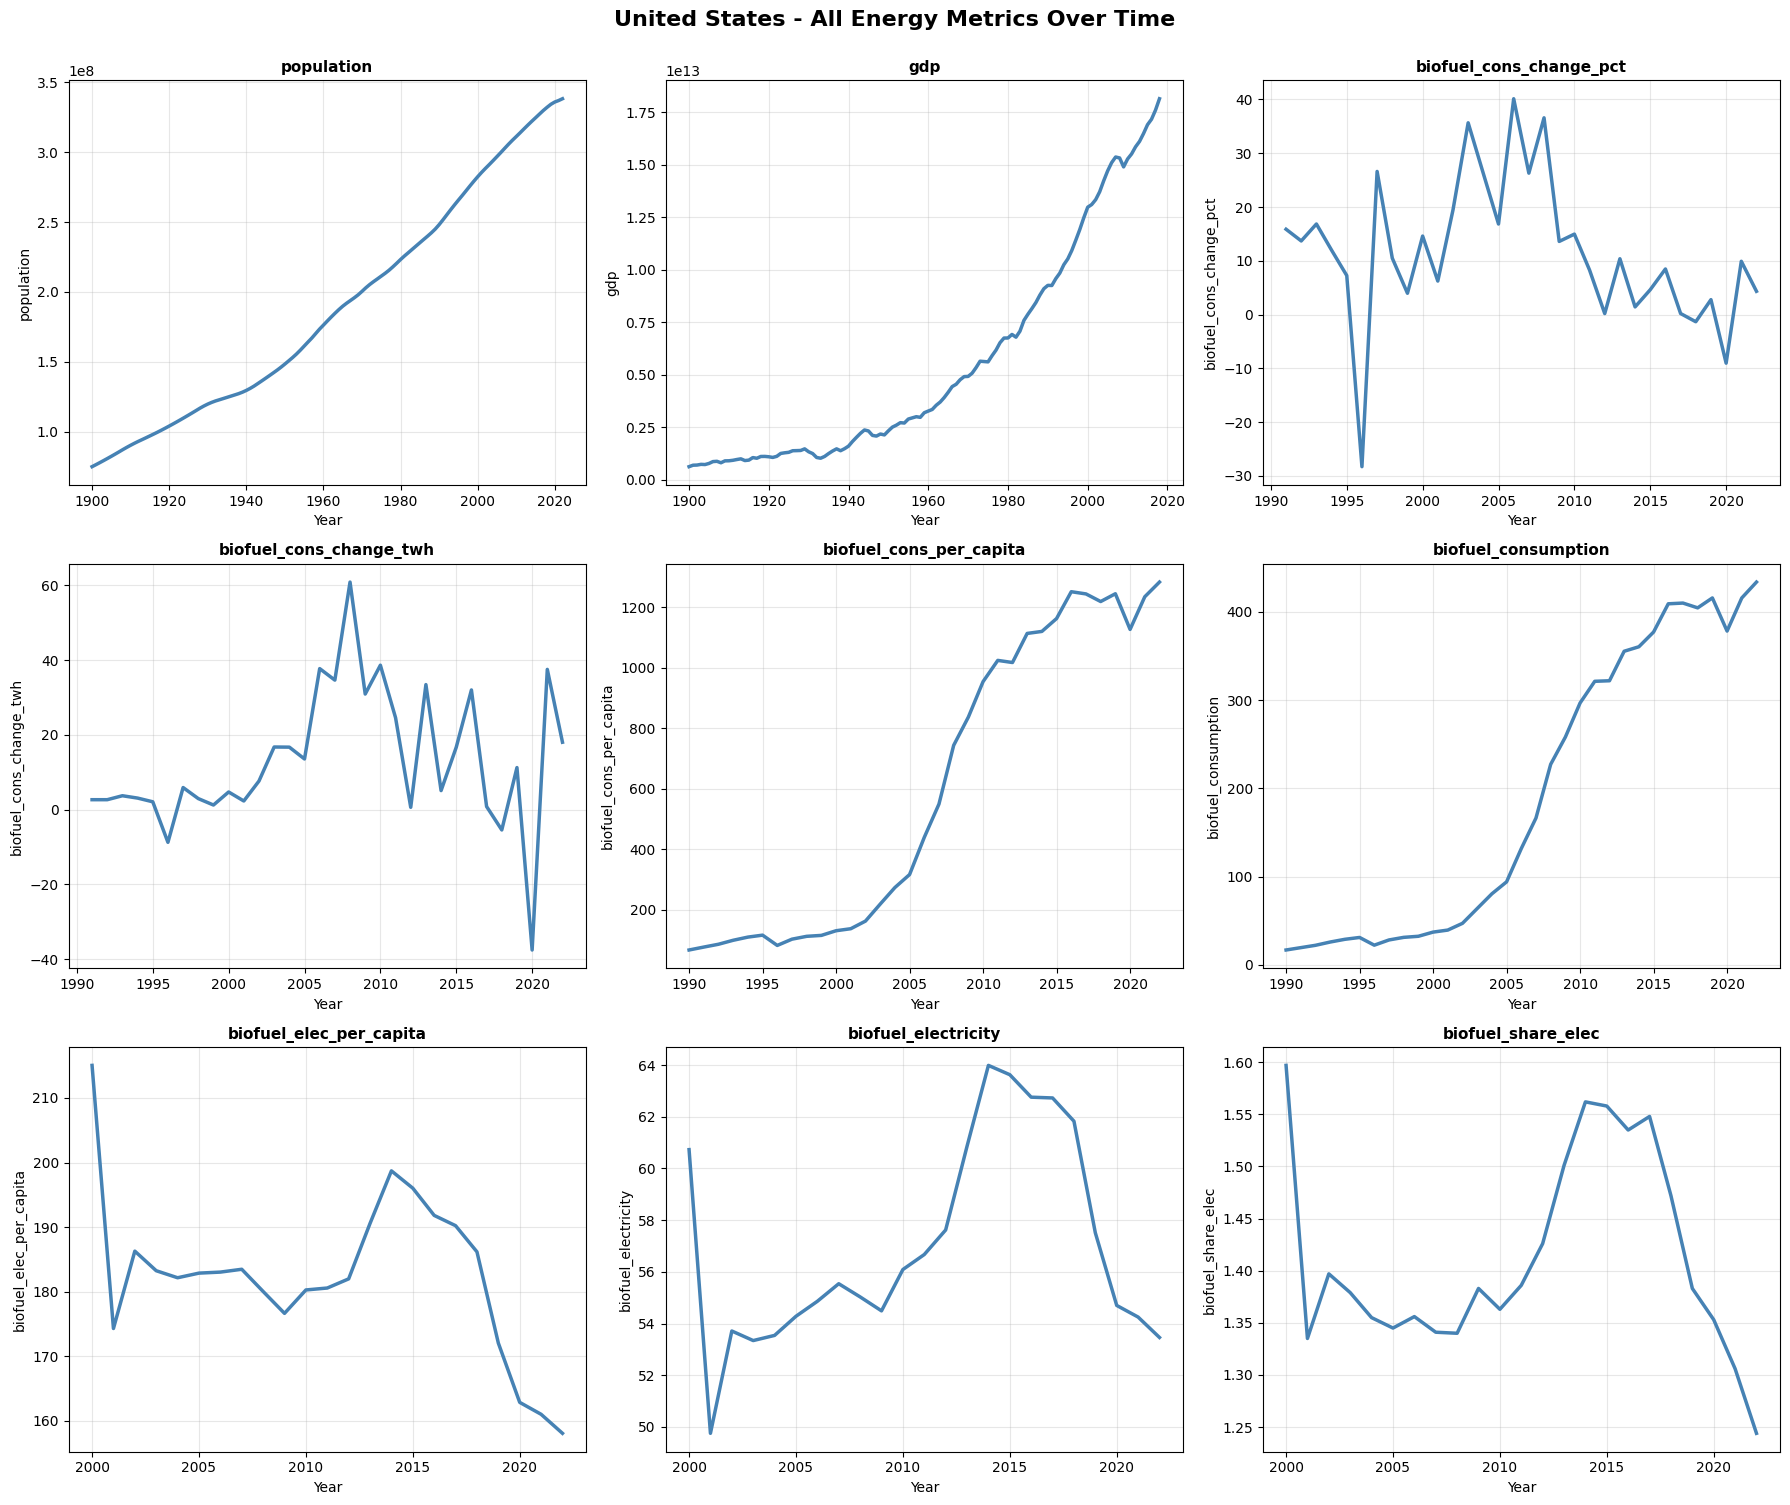


✅ Analysis Complete for United States


💡 To explore other countries, use:
   explore_country('China')
   explore_country('India')
   explore_country('Brazil')
   explore_country('Germany')

📊 COMPREHENSIVE ANALYSIS FOR: Mexico

🌍 COUNTRY STATISTICS
--------------------------------------------------------------------------------
📍 Continent: North America
💰 Wealth Category: Unknown
📅 Most Recent Year: 2022
⚡ Energy Consumption: 2423.75 TWh
👥 Population: 127,504,120
N/A
N/A
🌐 Similar Countries: United States, Canada, Guatemala
--------------------------------------------------------------------------------

📈 Generating Primary Energy Consumption Forecast...


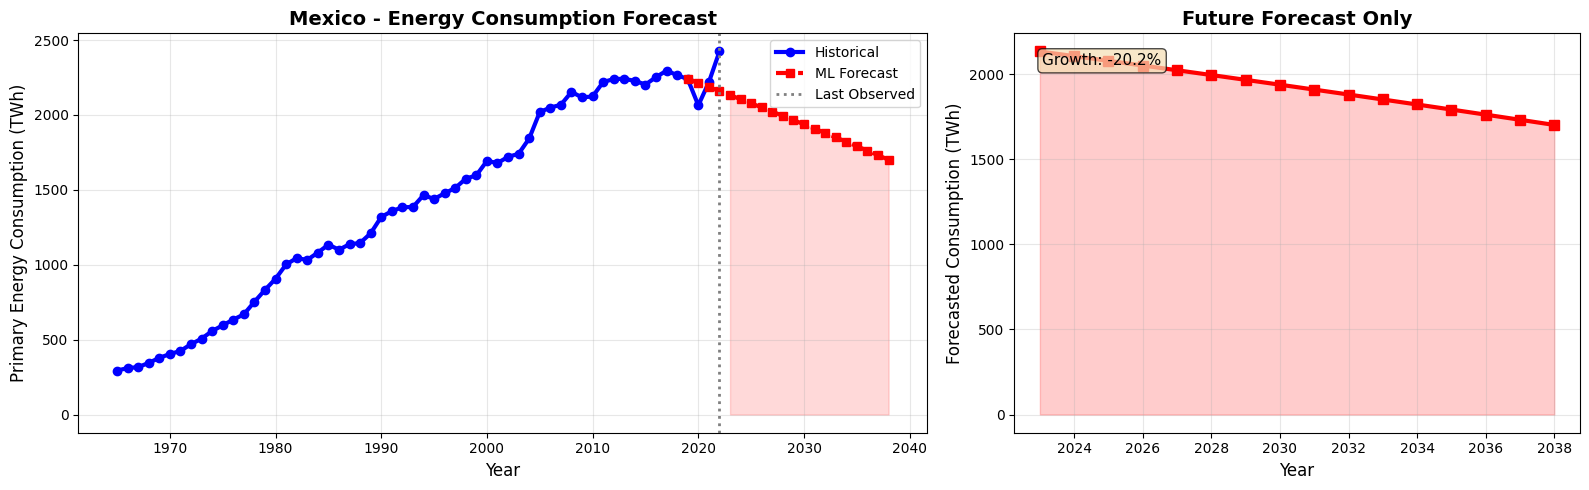

📊 Generating ARIMA Time Series Forecast...


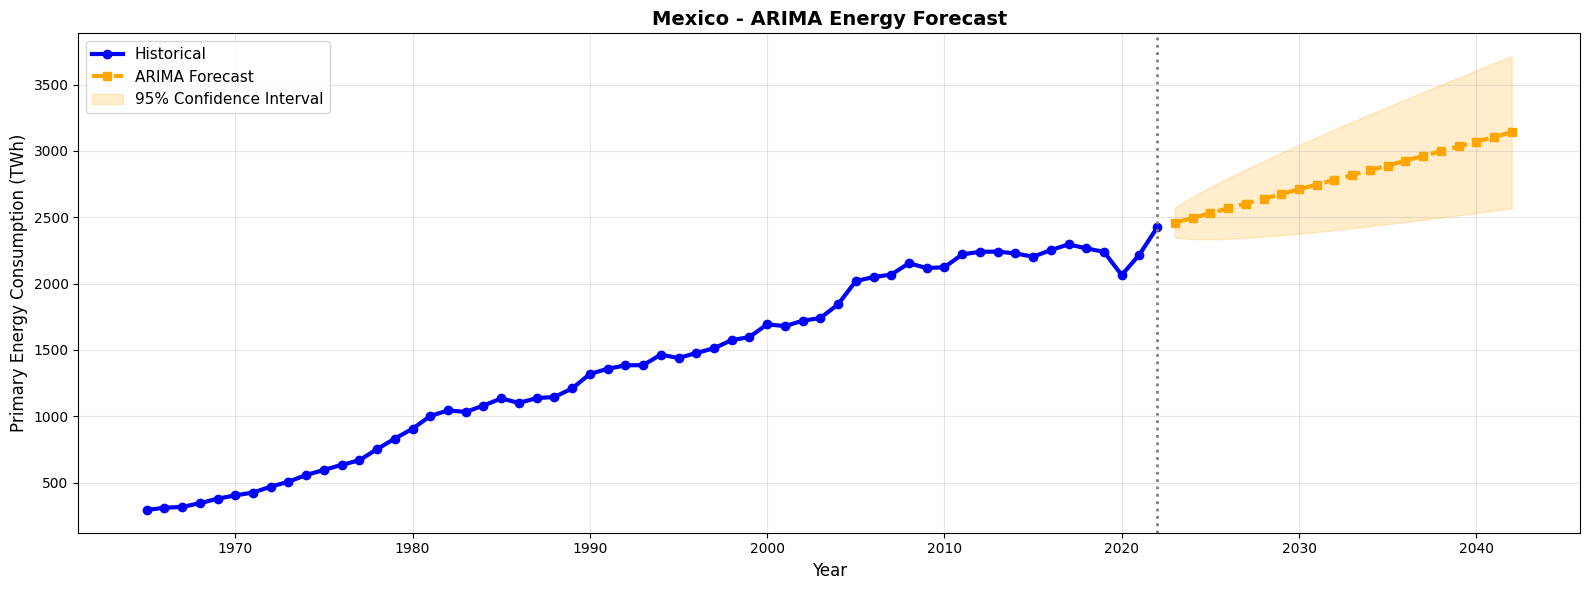

⚙️ Generating All Energy Metrics...


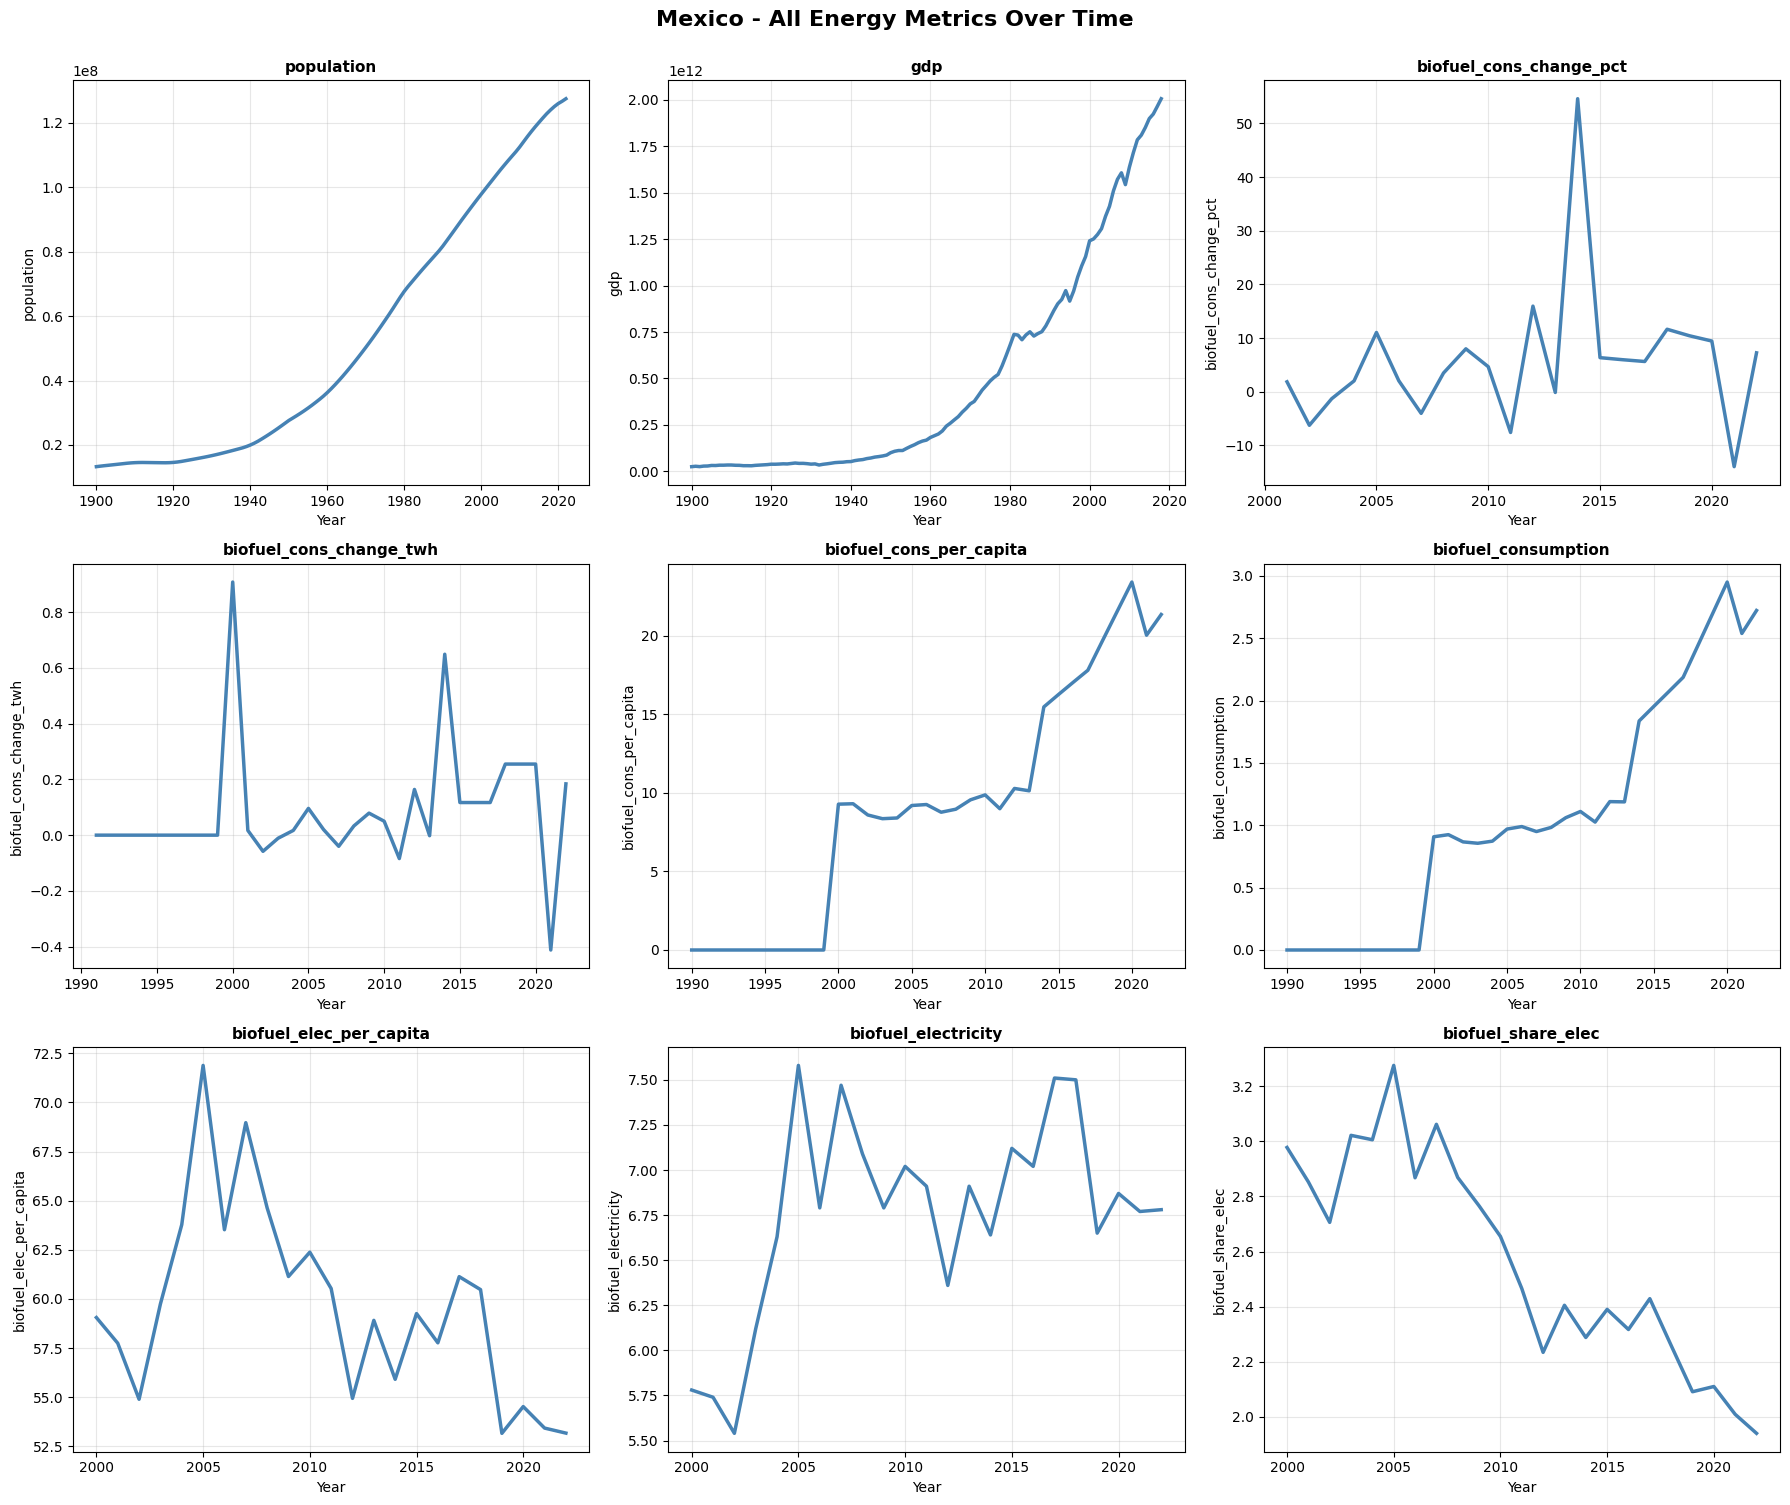


✅ Analysis Complete for Mexico



In [ ]:


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# FUNCTION: Generate ALL Plots for Selected Count

def generate_all_country_plots(country_name):


    print(f"\n{'='*80}")
    print(f"📊 COMPREHENSIVE ANALYSIS FOR: {country_name}")
    print(f"{'='*80}\n")

    # Check if country exists
    if country_name not in country_dataframes:
        print(f"❌ No data available for {country_name}")
        return

    country_df = country_dataframes[country_name]


    # STATISTICS SUMMARY

    recent_data = country_df.sort_values('year').iloc[-1]

    print(f"🌍 COUNTRY STATISTICS")
    print(f"{'-'*80}")
    print(f"📍 Continent: {country_df['continent'].iloc[0] if 'continent' in country_df.columns else 'N/A'}")
    print(f"💰 Wealth Category: {country_df.sort_values('year').iloc[-1]['wealth_category'] if 'wealth_category' in country_df.columns else 'N/A'}")
    print(f"📅 Most Recent Year: {int(recent_data['year'])}")
    print(f"⚡ Energy Consumption: {recent_data['primary_energy_consumption']:.2f} TWh" if 'primary_energy_consumption' in recent_data else 'N/A')
    print(f"👥 Population: {recent_data['population']:,.0f}" if 'population' in recent_data and pd.notna(recent_data['population']) else 'N/A')
    print(f"💵 GDP: ${recent_data['gdp']:,.2f}B" if 'gdp' in recent_data and pd.notna(recent_data['gdp']) else 'N/A')
    print(f"💳 GDP per Capita: ${recent_data['gdp_per_capita']:,.2f}" if 'gdp_per_capita' in recent_data and pd.notna(recent_data['gdp_per_capita']) else 'N/A')

    if country_name in country_similarities:
        print(f"🌐 Similar Countries: {', '.join(country_similarities[country_name][:3])}")
    print(f"{'-'*80}\n")

    # PLOT 1: Main Forecast (Historical + ML Prediction)

    print("📈 Generating Primary Energy Consumption Forecast...")

    fig = plt.figure(figsize=(16, 5))
    gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1])

    # Left: Full timeline
    ax1 = fig.add_subplot(gs[0])

    hist_data = country_df[['year', 'primary_energy_consumption']].dropna()
    if not hist_data.empty:
        ax1.plot(hist_data['year'], hist_data['primary_energy_consumption'],
                'o-', label='Historical', linewidth=3, color='blue', markersize=6)

    # ML Forecast
    if country_name in multi_forecasts_df['country'].values:
        fut = multi_forecasts_df[multi_forecasts_df["country"] == country_name].sort_values("year")
        ax1.plot(fut['year'], fut['forecast_energy'],
                's--', label='ML Forecast', linewidth=3, color='red', markersize=6)

        last_year = hist_data['year'].max() if not hist_data.empty else None
        if last_year:
            ax1.axvline(x=last_year, color='gray', linestyle=':', linewidth=2, label='Last Observed')
            ax1.fill_between(fut['year'], 0, fut['forecast_energy'],
                           where=(fut['year'] > last_year), alpha=0.15, color='red')

    ax1.set_title(f'{country_name} - Energy Consumption Forecast', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Primary Energy Consumption (TWh)', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Right: Future only (zoomed)
    ax2 = fig.add_subplot(gs[1])

    if country_name in multi_forecasts_df['country'].values:
        fut = multi_forecasts_df[multi_forecasts_df["country"] == country_name].sort_values("year")
        last_year = hist_data['year'].max() if not hist_data.empty else None
        future_only = fut[fut['year'] > last_year] if last_year else fut

        if not future_only.empty:
            ax2.plot(future_only['year'], future_only['forecast_energy'],
                    's-', linewidth=3, color='red', markersize=7)
            ax2.fill_between(future_only['year'], 0, future_only['forecast_energy'],
                           alpha=0.2, color='red')

            # Growth percentage
            first_val = future_only['forecast_energy'].iloc[0]
            last_val = future_only['forecast_energy'].iloc[-1]
            growth_pct = ((last_val - first_val) / first_val) * 100

            ax2.text(0.05, 0.95, f'Growth: {growth_pct:+.1f}%',
                    transform=ax2.transAxes, fontsize=11, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

    ax2.set_title('Future Forecast Only', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Forecasted Consumption (TWh)', fontsize=12)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # PLOT 2: ARIMA Forecast

    print("📊 Generating ARIMA Time Series Forecast...")

    data = (
        df_clean[df_clean['country'] == country_name]
        .sort_values('year')[['year', 'primary_energy_consumption']]
        .dropna()
    )

    if len(data) >= 10:
        try:
            data['date'] = pd.to_datetime(data['year'], format='%Y')
            data = data.set_index('date').asfreq('YS')
            series = data['primary_energy_consumption']

            model = ARIMA(series, order=(1,1,1))
            model_fit = model.fit()

            forecast_res = model_fit.get_forecast(steps=20)
            forecast_mean = forecast_res.predicted_mean
            conf_int = forecast_res.conf_int()

            future_dates = pd.date_range(
                start=series.index[-1] + pd.offsets.YearBegin(),
                periods=20, freq='YS'
            )
            forecast_mean.index = future_dates
            conf_int.index = future_dates

            plt.figure(figsize=(16, 6))

            plt.plot(series.index.year, series.values, 'o-',
                    label='Historical', linewidth=3, color='blue', markersize=6)
            plt.plot(forecast_mean.index.year, forecast_mean.values, 's--',
                    label='ARIMA Forecast', linewidth=3, color='orange', markersize=6)
            plt.fill_between(forecast_mean.index.year,
                           conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                           color='orange', alpha=0.2, label='95% Confidence Interval')

            plt.axvline(x=series.index[-1].year, color='gray', linestyle=':', linewidth=2)
            plt.title(f'{country_name} - ARIMA Energy Forecast', fontsize=14, fontweight='bold')
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Primary Energy Consumption (TWh)', fontsize=12)
            plt.legend(fontsize=11)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"⚠️ ARIMA forecast failed: {e}")
    else:
        print(f"⚠️ Insufficient data for ARIMA ({len(data)} points, need 10+)")

    # PLOT 3: All Energy Metrics (Grid)

    print("⚙️ Generating All Energy Metrics...")

    metrics_to_plot = [col for col in relevant_columns[:9] if col in country_df.columns
                       and not country_df[col].dropna().empty]

    if metrics_to_plot:
        n_metrics = len(metrics_to_plot)
        n_cols = 3
        n_rows = (n_metrics + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
        axes = axes.flatten() if n_metrics > 1 else [axes]

        for idx, col in enumerate(metrics_to_plot):
            ax = axes[idx]
            data = country_df[['year', col]].dropna()
            ax.plot(data['year'], data[col], linewidth=2.5, color='steelblue')
            ax.set_title(col, fontsize=11, fontweight='bold')
            ax.set_xlabel('Year', fontsize=10)
            ax.set_ylabel(col, fontsize=10)
            ax.grid(True, alpha=0.3)

        # Hide unused subplots
        for idx in range(n_metrics, len(axes)):
            axes[idx].axis('off')

        plt.suptitle(f'{country_name} - All Energy Metrics Over Time',
                    fontsize=16, fontweight='bold', y=1.0)
        plt.tight_layout()
        plt.show()

    print(f"\n{'='*80}")
    print(f"✅ Analysis Complete for {country_name}")
    print(f"{'='*80}\n")



# CREATE INTERACTIVE MAP WITH PLOTLY

def create_interactive_map_with_buttons():


    # Get most recent year data
    most_recent_year = df_clean['year'].max()
    map_data = df_clean[df_clean['year'] == most_recent_year].copy()
    map_data = map_data.dropna(subset=['iso_code', 'primary_energy_consumption'])

    # Create choropleth
    fig = px.choropleth(
        map_data,
        locations="iso_code",
        color="primary_energy_consumption",
        hover_name="country",
        hover_data={
            "primary_energy_consumption": ":.2f",
            "population": ":.0f",
            "gdp": ":.2f",
            "iso_code": False
        },
        color_continuous_scale="Viridis",
        projection="natural earth",
        title=f"🌍 Global Energy Consumption Map ({most_recent_year}) - Hover over countries",
        labels={"primary_energy_consumption": "Energy (TWh)"}
    )

    fig.update_layout(
        height=700,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth'
        )
    )

    fig.show()

    print("\n" + "="*80)
    print("💡 EXPLORE COUNTRIES")
    print("="*80)
    print("\nUse the function below to explore any country:")
    print("   explore_country('United States')")
    print("   explore_country('China')")
    print("   explore_country('Germany')")
    print("\nOr use the quick buttons below for top countries:")
    print("="*80 + "\n")



# QUICK EXPLORATION FUNCTION


def explore_country(country_name):
    """
    Quick function to explore any country
    Usage: explore_country("United States")
    """
    generate_all_country_plots(country_name)


# CREATE BUTTONS FOR TOP COUNTRIES (Interactive in Jupyter)

def create_country_explorer_buttons():
    """
    Create interactive buttons for top countries (Jupyter only)
    """
    try:
        import ipywidgets as widgets
        from IPython.display import display

        # Get top 20 countries by energy consumption
        top_countries = (
            df_clean.groupby('country')['primary_energy_consumption']
            .sum()
            .sort_values(ascending=False)
            .head(20)
            .index.tolist()
        )

        # Create buttons
        buttons = []
        for country in top_countries:
            btn = widgets.Button(
                description=country,
                button_style='info',
                layout=widgets.Layout(width='200px', height='40px')
            )

            def on_button_click(b, c=country):
                generate_all_country_plots(c)

            btn.on_click(on_button_click)
            buttons.append(btn)

        # Display in grid
        print("\n🎯 TOP 20 COUNTRIES - Click to Explore:")
        print("="*80 + "\n")

        grid = widgets.GridBox(
            buttons,
            layout=widgets.Layout(
                grid_template_columns="repeat(4, 200px)",
                grid_gap='10px'
            )
        )

        display(grid)

    except ImportError:
        print("⚠️ ipywidgets not available. Use: explore_country('Country Name')")


# MAIN DASHBOARD LAUNCHER


print("\n" + "="*80)
print("🚀 LAUNCHING INTERACTIVE ENERGY DASHBOARD")
print("="*80 + "\n")

# Show the map
create_interactive_map_with_buttons()

# Show exploration buttons (if in Jupyter)
create_country_explorer_buttons()

# Quick examples
print("\n📌 QUICK START EXAMPLES:\n")
print("Explore United States:")
explore_country("United States")

print("\n" + "="*80)
print("💡 To explore other countries, use:")
print("   explore_country('China')")
print("   explore_country('India')")
print("   explore_country('Brazil')")
print("   explore_country('Germany')")
print("="*80)